* Bernice AGOSSOUVO

# Projet de Data mining  : Prédiction des défauts de paiement des prêts automobiles

Contexte du projet : Nous cherchons à prédire avec précision les défauts de paiement des prêts automobiles. C'est à dire la probabilité qu'un preneur de crédit/l'emprunteur ne rembourse pas son prêt automobile à la date d'échéance du premier versement mensuel équivalent. En effet les institutions financières subissent des pertes importantes en raison des défauts de paiement des prêts automobiles. Et savoir si un client entre dans la masse de ceux qui sont défaillants au niveau du remboursement de ces prêts est un enjeu important pour les entreprises. Puisque cela permettrait de réduire le risque du crédit.

En d'autres mots nous traitons un problème de scoring qui est une méthode qui consiste à affecter une note (score) à chaque client ou prospect d'une base de données.
il existe plusieurs type de score : score d'appétence, score d'Octroi ou d'acceptation, score de comportement etc...

Dans ce projet nous construisons un score d'octroi qui est la probabilité d’un client de rencontrer un incident de paiement ou de remboursement; concrètement nous construirons un modèle probabliste qui permettrait de détecter la probabibilité de défaillance d'un client. soit P cette probabilité, plus elle est tend vers 1 plus le client sera défaillant, sinon il est susceptible de payer son prêt.

Les différentes parties de ce projet :

**Importation et exploration des données**

**Traitement des variables**

**Statistiques univariée- bivariée**

**Transformation de certaines variables si besoin**

**Construction des modèles**


In [2]:
%load_ext rpy2.ipython

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter('ignore')

Chargement de la base de données 

In [3]:
data = pd.read_excel('table_training.xlsx')

## Exploration des données

In [4]:
data.shape # 233154 enregistrements et 38 variables

(233154, 38)

Notre jeu de données comporte 233154 enregistrements et 38 variables

In [5]:
data.head(10)# vue de l'en-tête de la base

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id_K,supplier_id_K,manufacturer_id_K,Current_pincode_ID_K,Employment_Type_K,State_ID_K,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_THS,DELINQUENT_ACCTS_IN_LAST_SIX_THS,AVERAGE_ACCT_AGE_bis,CREDIT_HISTORY_LENGTH_bis,NO_OF_INQUIRIES_K,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,Salaried,6,...,0,0,0,0,0,0,-,-,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,Self employed,6,...,0,0,1991,0,0,1,2,2,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,Self employed,6,...,0,0,0,0,0,0,0,0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,Self employed,6,...,0,0,31,0,0,0,1,1,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,Self employed,6,...,0,0,0,0,0,0,0,0,1,1
5,518279,54513,61900,89.66,67,22807,45,1501,Self employed,6,...,0,0,1347,0,0,0,2,2,0,0
6,529269,46349,61500,76.42,67,22807,45,1502,Salaried,6,...,0,0,0,0,0,0,0,0,0,0
7,510278,43894,61900,71.89,67,22807,45,1501,Salaried,6,...,0,0,0,0,0,0,0,0,0,0
8,490213,53713,61973,89.56,67,22807,45,1497,Self employed,6,...,0,0,0,0,0,0,5,5,1,0
9,510980,52603,61300,86.95,67,22807,45,1492,Salaried,6,...,0,0,2608,0,0,0,2,2,0,0


* Notre base contient - elle de doublons ?

In [6]:
data.duplicated().unique()

array([False])

Après verification, on constate que la base est composée d'enregistrements uniques. Pas de doublons

* Présence de valeurs manquantes ? Si oui à quelle proportion ?

In [7]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, round(percent,2)], axis=1, keys=['Total', 'Percent %'])
missing_data.head(15)

,Total,Percent %
Employment_Type_K,7661,3.29
State_ID_K,0,0.00
PERFORM_CNS_SCORE,0,0.00
Passport_flag,0,0.00
Driving_flag,0,0.00
VoterID_flag,0,0.00
PAN_flag,0,0.00
Aadhar_flag,0,0.00
Employee_code_ID_K,0,0.00
loan_default,0,0.00


Seule la variable **Employment_Type_K** contient des valeurs manquantes avec un pourcentage de 3,29 %

* le type des variables 

In [8]:
data.dtypes

UniqueID                              int64
disbursed_amount                      int64
asset_cost                            int64
ltv                                 float64
branch_id_K                           int64
supplier_id_K                         int64
manufacturer_id_K                     int64
Current_pincode_ID_K                  int64
Employment_Type_K                    object
State_ID_K                            int64
Employee_code_ID_K                    int64
Aadhar_flag                           int64
PAN_flag                              int64
VoterID_flag                          int64
Driving_flag                          int64
Passport_flag                         int64
PERFORM_CNS_SCORE                     int64
PERFORM_CNS_SCORE_DESCRIPTION        object
PRI_NO_OF_ACCTS                       int64
PRI_ACTIVE_ACCTS                      int64
PRI_OVERDUE_ACCTS                     int64
PRI_CURRENT_BALANCE                   int64
PRI_SANCTIONED_AMOUNT           

### Renommage des variables de notre jeu de données

In [9]:
data.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id_K',
       'supplier_id_K', 'manufacturer_id_K', 'Current_pincode_ID_K',
       'Employment_Type_K', 'State_ID_K', 'Employee_code_ID_K', 'Aadhar_flag',
       'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag',
       'PERFORM_CNS_SCORE', 'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS',
       'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE',
       'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS',
       'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE',
       'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT',
       'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_THS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_THS', 'AVERAGE_ACCT_AGE_bis',
       'CREDIT_HISTORY_LENGTH_bis', 'NO_OF_INQUIRIES_K', 'loan_default'],
      dtype='object')

In [4]:
data = data.rename(columns = {"UniqueID":"ID","loan_default":"Defaut_paiement","disbursed_amount" :"Montant_pret",
                             "asset_cost":"CoutActif","ltv" :"Rapport_Pret_Valeur","branch_id_K" :"branch",
                              "supplier_id_K":"supplier","manufacturer_id_K" :"manufacturer",
                              "Current_pincode_ID_K":"Code_postal_actuel","Employment_Type_K" :"type_emploi",
                             "State_ID_K" : "Etat_deboursement","Employee_code_ID_K" :"Employee_code",
                             "Aadhar_flag": "Numero_Aadhar","PERFORM_CNS_SCORE" :"Score_bureau",
                              "PERFORM_CNS_SCORE_DESCRIPTION" :"Description_score_bureau",
                              "PRI_NO_OF_ACCTS" : "nbTotal_pretContracte",
                             "NO_OF_INQUIRIES_K" : "Nb_Demande_Pret_Client",
                              "CREDIT_HISTORY_LENGTH_bis":"Temps_Ecoule_Depuis_Pret1",
                              "AVERAGE_ACCT_AGE_bis" : "Duree_Moy_Pret",
                              "DELINQUENT_ACCTS_IN_LAST_SIX_THS":"Defaut_Pret_6_DerMois",
                              "NEW_ACCTS_IN_LAST_SIX_THS":"Nv_Pret_6_Der_Mois",
                              "SEC_INSTAL_AMT":"Sec_Montant","PRIMARY_INSTAL_AMT":"Pri_Montant",
                              "SEC_DISBURSED_AMOUNT":"Sec_Montant_Decaisse",
                              "SEC_SANCTIONED_AMOUNT":"Sec_Montant_Sanctionne",
                              "SEC_CURRENT_BALANCE":"Sec_rest_du","PRI_ACTIVE_ACCTS" : "Pri_nb_pretActif",
                              "PRI_OVERDUE_ACCTS" : "Pri_nbCompte_defaut","SEC_OVERDUE_ACCTS" :"Sec_nbCompte_defaut",
                             "PRI_CURRENT_BALANCE":"Pri_rest_du","PRI_SANCTIONED_AMOUNT":"Pri_Montant_Sanctionne",
                              "PRI_DISBURSED_AMOUNT":"Pri_Montant_decaisse",
                              "SEC_NO_OF_ACCTS":"Sec_no_nb_pretActif", "SEC_ACTIVE_ACCTS":"Sec_nb_pretActif"

                              
})

In [11]:
data.columns

Index(['ID', 'Montant_pret', 'CoutActif', 'Rapport_Pret_Valeur', 'branch',
       'supplier', 'manufacturer', 'Code_postal_actuel', 'type_emploi',
       'Etat_deboursement', 'Employee_code', 'Numero_Aadhar', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 'Score_bureau',
       'Description_score_bureau', 'nbTotal_pretContracte', 'Pri_nb_pretActif',
       'Pri_nbCompte_defaut', 'Pri_rest_du', 'Pri_Montant_Sanctionne',
       'Pri_Montant_decaisse', 'Sec_no_nb_pretActif', 'Sec_nb_pretActif',
       'Sec_nbCompte_defaut', 'Sec_rest_du', 'Sec_Montant_Sanctionne',
       'Sec_Montant_Decaisse', 'Pri_Montant', 'Sec_Montant',
       'Nv_Pret_6_Der_Mois', 'Defaut_Pret_6_DerMois', 'Duree_Moy_Pret',
       'Temps_Ecoule_Depuis_Pret1', 'Nb_Demande_Pret_Client',
       'Defaut_paiement'],
      dtype='object')

## Traitement des valeurs manquantes de la base

On avait vu précedemment que seule la variable **Type_emploi** de type qualitative comporte des valeurs maquantes.
Pour les traiter, on a soit le choix de:

* supprimer ces valeurs,
* les transformer par la modalité dominante afin de ne pas perdre les 3.29% d'enregistrements
* supposer que ces valeurs manquantes englobent la modalité **Unemployed** c'est à dire chomeurs

Pour la suite, on a fait le choix de la troisième option. Ainsi notre jeu de données ne contiendra pas de biais



In [5]:
data['type_emploi'].value_counts()

Self employed    127635
Salaried          97858
Name: type_emploi, dtype: int64

In [6]:
data['type_emploi'].fillna('Unemployed', inplace = True)# remplace les NA par 'Unemployed'

In [7]:
data['type_emploi'].value_counts()

Self employed    127635
Salaried          97858
Unemployed         7661
Name: type_emploi, dtype: int64

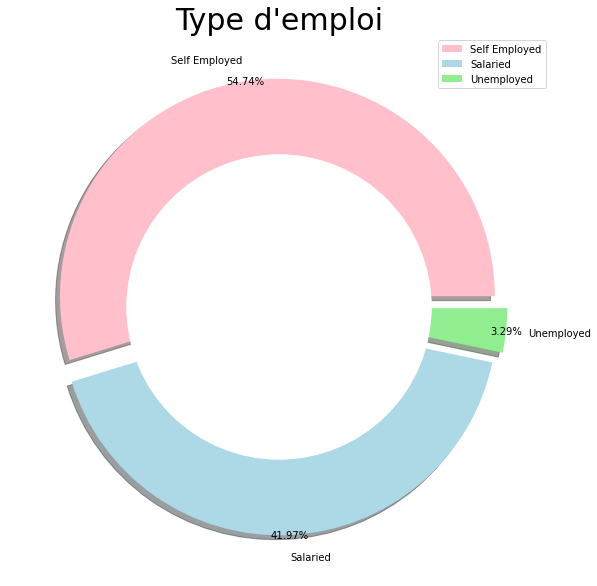

In [15]:
# plotting a donut chart

size = [127635, 97858, 7661]
colors = ['pink', 'lightblue', 'lightgreen']
labels = "Self Employed", "Salaried", "Unemployed" 
explode = [0.05, 0.05, 0.05]

circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, pctdistance = 1, autopct = '%.2f%%')
plt.title("Type d'emploi", fontsize = 30)
plt.axis('off')
p = plt.gcf()
p.gca().add_artist(circle)
plt.legend()
plt.show()

## Autres traitements 

In [8]:
data = data[data.Duree_Moy_Pret != " -     "] # suppression des cellules ne contenant que des "-""
data = data[data.Temps_Ecoule_Depuis_Pret1 != " -     "]

In [9]:
## Conversion de certaines variables de type object en float
data['Duree_Moy_Pret']=pd.to_numeric(data['Duree_Moy_Pret'], errors='coerce')
data['Temps_Ecoule_Depuis_Pret1']=pd.to_numeric(data['Temps_Ecoule_Depuis_Pret1'], errors='coerce')


In [18]:
# Sauvegarde de la base traitée
data.to_csv('base0.csv', index = False )

 ### Le pourcentage des defauts de paiement 

In [19]:
data['Defaut_paiement'].value_counts()

0    182542
1     50611
Name: Defaut_paiement, dtype: int64

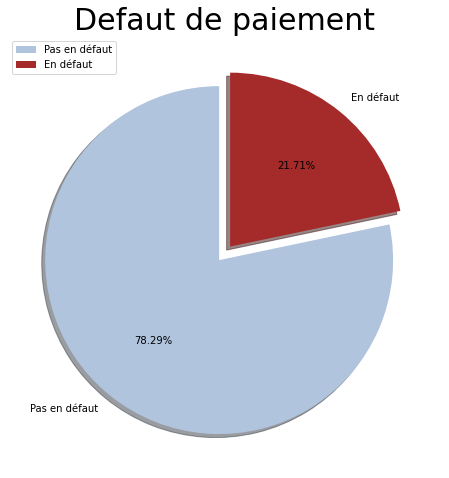

In [20]:
# plotting a donut chart

size = [182542, 50611]
colors = ['lightsteelblue','brown']
labels = "Pas en défaut","En défaut"
explode = [0.05, 0.05]

circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, startangle=90, autopct = '%.2f%%')
plt.title("Defaut de paiement", fontsize = 30)
plt.axis('off')
p = plt.gcf()
plt.legend()
plt.show()

## Description des variables 

In [10]:
liste = ['Montant_pret','CoutActif','Rapport_Pret_Valeur','nbTotal_pretContracte',
    'Pri_nb_pretActif','Pri_nbCompte_defaut','Pri_rest_du','Pri_Montant_Sanctionne',
    'Pri_Montant_decaisse','Sec_no_nb_pretActif','Sec_nb_pretActif',
    'Sec_nbCompte_defaut','Sec_rest_du','Sec_Montant_Sanctionne','Sec_Montant_Decaisse',
    'Pri_Montant','Sec_Montant','Nv_Pret_6_Der_Mois','Defaut_Pret_6_DerMois',
    'Duree_Moy_Pret','Temps_Ecoule_Depuis_Pret1','Nb_Demande_Pret_Client','Score_bureau','Defaut_paiement']
df_quanti = data[liste] # la base des variables quantitatives + la variable cible

liste = ['Montant_pret','CoutActif','Rapport_Pret_Valeur','nbTotal_pretContracte',
    'Pri_nb_pretActif','Pri_nbCompte_defaut','Pri_rest_du','Pri_Montant_Sanctionne',
    'Pri_Montant_decaisse','Sec_no_nb_pretActif','Sec_nb_pretActif',
    'Sec_nbCompte_defaut','Sec_rest_du','Sec_Montant_Sanctionne','Sec_Montant_Decaisse',
    'Pri_Montant','Sec_Montant','Nv_Pret_6_Der_Mois','Defaut_Pret_6_DerMois',
    'Duree_Moy_Pret','Temps_Ecoule_Depuis_Pret1','Nb_Demande_Pret_Client','Score_bureau']
df_quali = data.drop(liste, axis =1) # la base des variables qualitatives


In [22]:
df_quali.columns

Index(['ID', 'branch', 'supplier', 'manufacturer', 'Code_postal_actuel',
       'type_emploi', 'Etat_deboursement', 'Employee_code', 'Numero_Aadhar',
       'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag',
       'Description_score_bureau', 'Defaut_paiement'],
      dtype='object')

### Variable Binaire

<AxesSubplot:xlabel='count', ylabel='Defaut_paiement'>

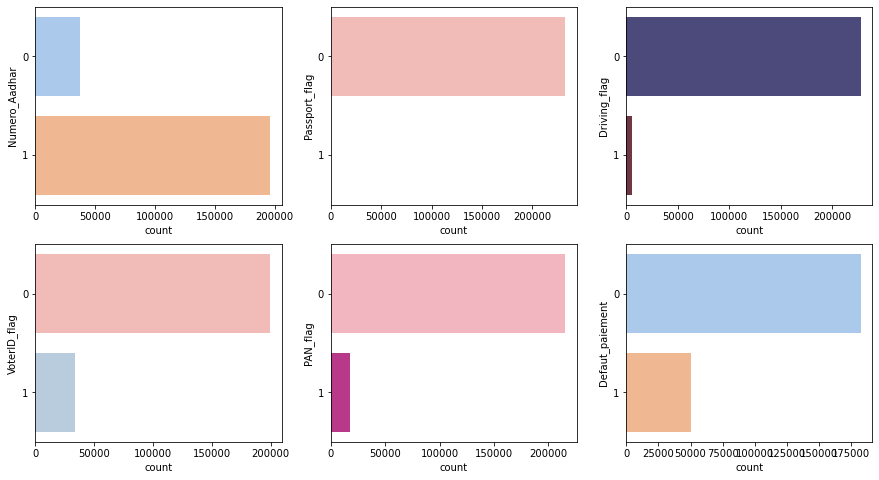

In [23]:
# Statistique des variables binaires
f, axes = plt.subplots(2,3,figsize =(15,8)) 
sns.countplot(y = df_quali['Numero_Aadhar'], data = df_quali, palette = 'pastel',ax = axes[0,0])
sns.countplot(y = df_quali['Passport_flag'], data = df_quali, palette = 'Pastel1',ax = axes[0,1])
sns.countplot(y = df_quali['Driving_flag'], data = df_quali, palette = 'icefire',ax = axes[0,2])
sns.countplot(y = df_quali['PAN_flag'], data = df_quali, palette = 'RdPu',ax = axes[1,1])
sns.countplot(y = df_quali['VoterID_flag'], data = df_quali, palette = 'Pastel1',ax = axes[1,0])
sns.countplot(y = df_quali['Defaut_paiement'], data = df_quali, palette = 'pastel',ax = axes[1,2])

On remarque que la plupart des clients ne donnent pas d'informations concernant leur numéro Aadhar, leur pan etc...
Pour le passeport par ex, on est à une fréquence de 0,21 % de clients ayant fournir cette information. on pourra suivant une premère analyse, supposer que ces 05 premières variables binaires ne seraient pas très significatives de la variable (défaut de paiement). 
Quant au type d'emploi du clients,43,39% sont salariés contre  56,60% de travailleur indépendants. est ce que cette variable détermine si un client serait défaillant dans le paiement de son prêt automobile ? Une analyse croisée avec la variable cible nous donnerait plus d'informations. 
Pour linstant on poursuit notre statistique descriptive des autres variables.

In [24]:
## les proportions de chaque modalité des variables binaires
binaire = ['Numero_Aadhar',
       'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag']
for i in binaire :
    print(df_quali[i].value_counts()/ len(data)*100)

1    84.031945
0    15.968055
Name: Numero_Aadhar, dtype: float64
0    92.442302
1     7.557698
Name: PAN_flag, dtype: float64
0    85.505655
1    14.494345
Name: VoterID_flag, dtype: float64
0    97.675775
1     2.324225
Name: Driving_flag, dtype: float64
0    99.787264
1     0.212736
Name: Passport_flag, dtype: float64


### Variables catégorielles à plusieurs modalités

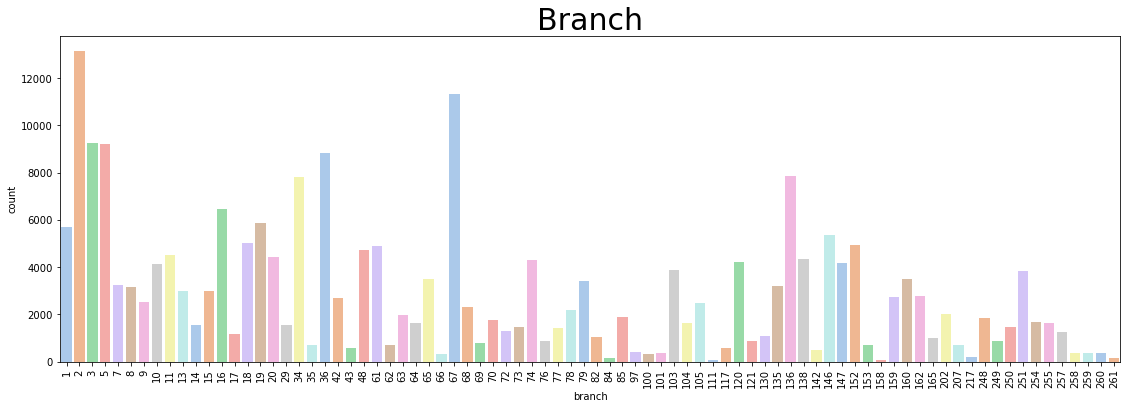

In [43]:
# Variable Branch 
plt.rcParams['figure.figsize'] = (19, 6)
sns.countplot(df_quali['branch'], palette = 'pastel')
plt.title('Branch', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

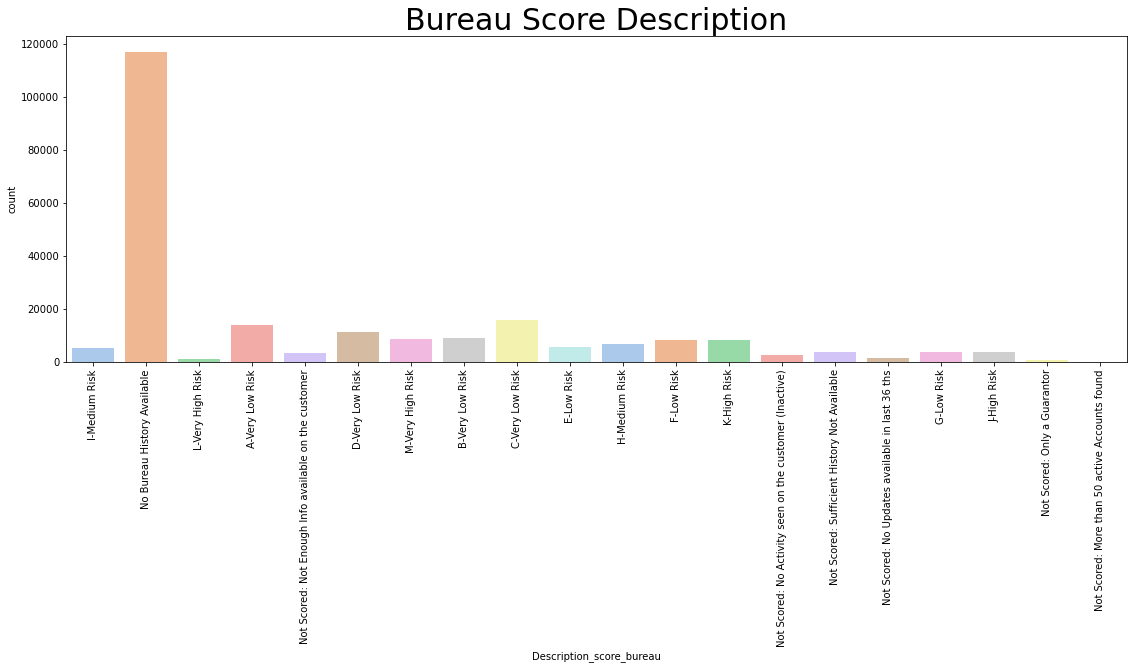

In [44]:
# checking the bureau score description

plt.rcParams['figure.figsize'] = (19, 6)
sns.countplot(df_quali['Description_score_bureau'], palette = 'pastel')
plt.title('Bureau Score Description', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

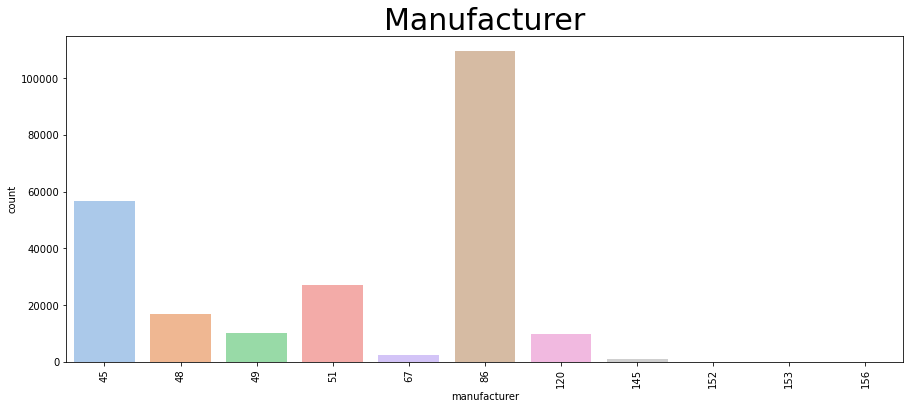

In [45]:

plt.rcParams['figure.figsize'] = (15, 6)
sns.countplot(data['manufacturer'], palette = 'pastel')
plt.title('Manufacturer', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

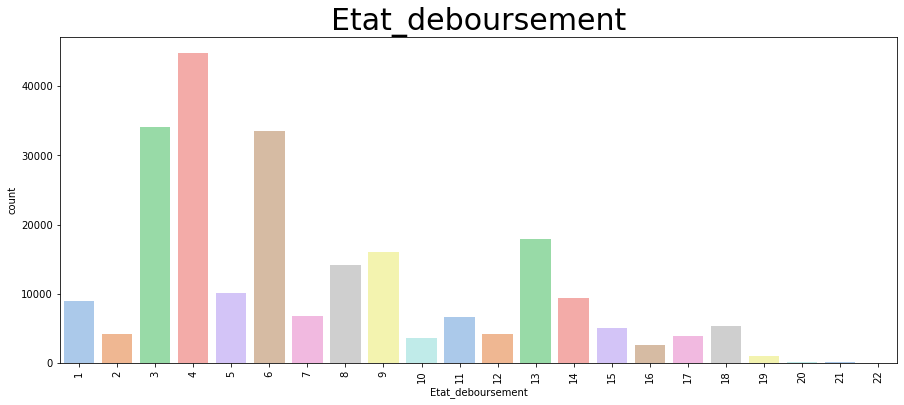

In [46]:
plt.rcParams['figure.figsize'] = (15, 6)
sns.countplot(df_quali['Etat_deboursement'], palette = 'pastel')
plt.title('Etat_deboursement', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='Employee_code', ylabel='count'>

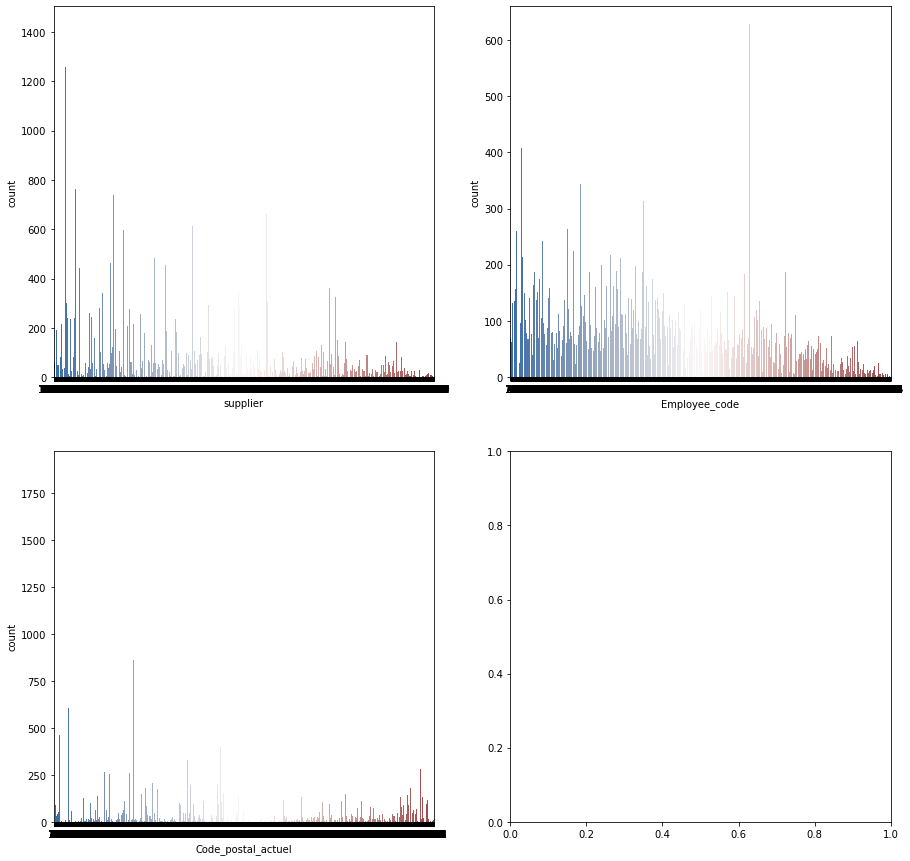

In [40]:
## Description des variables catégorielles à plusieurs modalités
f, axes = plt.subplots(2,2,figsize = (15,15))
sns.countplot(x = df_quali['supplier'], data = df_quali, palette = 'vlag', ax =axes[0,0])
sns.countplot(x = df_quali['Code_postal_actuel'], data = df_quali, palette = 'vlag', ax =axes[1,0])
sns.countplot(x = df_quali['Employee_code'], data = df_quali, palette = 'vlag', ax =axes[0,1])

Dans la suite de ce projet, 
La plupart des variables catégorielles feront l'objet de regroupement de modalités. En effet celles qui ont plus de 8 modalités. cela nous permettra de mieux appréhender l'information contenue dans les variables.
On ira ainsi les traiter une à une. Premièrement en les croisant avec la variable cible. Pour réperer celle qui ont le même comportement suivant cette dernière.

### Statistique descriptives des variables quantitatives

In [30]:
df_quanti.describe().T

,count,mean,std,min,25%,50%,75%,max
Montant_pret,233153.0,54357.009736,1.297134e+04,13320.00,47145.00,53803.0,60413.00,9.905720e+05
CoutActif,233153.0,75865.143052,1.894479e+04,37000.00,65717.00,70946.0,79202.00,1.628992e+06
Rapport_Pret_Valeur,233153.0,74.746467,1.145662e+01,10.03,68.88,76.8,83.67,9.500000e+01
nbTotal_pretContracte,233153.0,2.440646,5.217242e+00,0.00,0.00,0.0,3.00,4.530000e+02
Pri_nb_pretActif,233153.0,1.039901,1.941499e+00,0.00,0.00,0.0,1.00,1.440000e+02
Pri_nbCompte_defaut,233153.0,0.156550,5.487878e-01,0.00,0.00,0.0,0.00,2.500000e+01
Pri_rest_du,233153.0,165900.788487,9.422755e+05,-6678296.00,0.00,0.0,35008.00,9.652492e+07
Pri_Montant_Sanctionne,233153.0,218504.792492,2.374799e+06,0.00,0.00,0.0,62500.00,1.000000e+09
Pri_Montant_decaisse,233153.0,218066.833946,2.377749e+06,0.00,0.00,0.0,60800.00,1.000000e+09
Sec_no_nb_pretActif,233153.0,0.059081,6.267959e-01,0.00,0.00,0.0,0.00,5.200000e+01


In [31]:
df_quanti[df_quanti['Defaut_paiement']==0].drop('Defaut_paiement', axis=1).describe().style.format("{:.2f}")

,Montant_pret,CoutActif,Rapport_Pret_Valeur,nbTotal_pretContracte,Pri_nb_pretActif,Pri_nbCompte_defaut,Pri_rest_du,Pri_Montant_Sanctionne,Pri_Montant_decaisse,Sec_no_nb_pretActif,Sec_nb_pretActif,Sec_nbCompte_defaut,Sec_rest_du,Sec_Montant_Sanctionne,Sec_Montant_Decaisse,Pri_Montant,Sec_Montant,Nv_Pret_6_Der_Mois,Defaut_Pret_6_DerMois,Duree_Moy_Pret,Temps_Ecoule_Depuis_Pret1,Nb_Demande_Pret_Client,Score_bureau
count,182542.00,182542.00,182542.00,182542.00,182542.00,182542.00,182542.00,182542.00,182542.00,182542.00,182542.00,182542.00,182542.00,182542.00,182542.00,182542.00,182542.00,182542.00,182542.00,182542.00,182542.00,182542.00,182542.00
mean,53826.49,75722.90,74.15,2.54,1.08,0.14,179488.56,232640.78,232033.84,0.06,0.03,0.01,5923.65,7908.78,7780.78,13951.67,335.95,0.40,0.09,0.78,1.43,0.19,299.79
std,13140.73,19015.01,11.68,5.26,2.01,0.53,994634.37,1234350.01,1240218.10,0.65,0.32,0.11,184111.26,195212.82,194598.07,157964.41,16588.10,0.97,0.37,1.30,2.46,0.67,342.88
min,13320.00,37000.00,10.03,0.00,0.00,0.00,-6678296.00,0.00,0.00,0.00,0.00,0.00,-574647.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,46369.00,65680.00,68.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,53303.00,70845.00,76.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15.00
75%,59947.00,78999.00,83.16,3.00,1.00,0.00,38162.75,69100.00,66741.25,0.00,0.00,0.00,0.00,0.00,0.00,2038.00,0.00,0.00,0.00,1.00,2.00,0.00,690.00
max,990572.00,1628992.00,95.00,354.00,144.00,25.00,96524920.00,105865712.00,105755712.00,52.00,36.00,8.00,36032852.00,30000000.00,30000000.00,25642806.00,4170901.00,35.00,20.00,31.00,37.00,36.00,890.00


In [32]:
df_quanti[df_quanti['Defaut_paiement']==1].drop('Defaut_paiement', axis=1).describe().style.format("{:.2f}")

,Montant_pret,CoutActif,Rapport_Pret_Valeur,nbTotal_pretContracte,Pri_nb_pretActif,Pri_nbCompte_defaut,Pri_rest_du,Pri_Montant_Sanctionne,Pri_Montant_decaisse,Sec_no_nb_pretActif,Sec_nb_pretActif,Sec_nbCompte_defaut,Sec_rest_du,Sec_Montant_Sanctionne,Sec_Montant_Decaisse,Pri_Montant,Sec_Montant,Nv_Pret_6_Der_Mois,Defaut_Pret_6_DerMois,Duree_Moy_Pret,Temps_Ecoule_Depuis_Pret1,Nb_Demande_Pret_Client,Score_bureau
count,50611.00,50611.00,50611.00,50611.00,50611.00,50611.00,50611.00,50611.00,50611.00,50611.00,50611.00,50611.00,50611.00,50611.00,50611.00,50611.00,50611.00,50611.00,50611.00,50611.00,50611.00,50611.00,50611.00
mean,56270.47,76378.18,76.88,2.09,0.89,0.20,116892.88,167519.60,167691.12,0.05,0.02,0.01,3639.45,5085.63,5013.27,10053.74,277.53,0.33,0.12,0.70,1.19,0.27,252.24
std,12150.26,18680.50,10.33,5.04,1.67,0.60,720451.28,4525738.06,4527095.23,0.53,0.29,0.11,106044.43,130717.87,130392.77,124665.51,11045.63,0.89,0.43,1.24,2.15,0.84,318.83
min,13369.00,37000.00,15.30,0.00,0.00,0.00,-2018309.00,0.00,0.00,0.00,0.00,0.00,-9625.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,49303.00,65894.00,72.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,55459.00,71326.00,79.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,61947.00,80061.50,84.68,2.00,1.00,0.00,25690.00,50000.00,50000.00,0.00,0.00,0.00,0.00,0.00,0.00,1867.00,0.00,0.00,0.00,1.00,2.00,0.00,610.00
max,191392.00,281164.00,95.00,453.00,35.00,18.00,45051160.00,1000000000.00,1000000000.00,38.00,22.00,6.00,10716039.00,11900000.00,11900000.00,15420411.00,1447600.00,20.00,12.00,16.00,39.00,19.00,879.00


In [33]:
df_quanti.columns

Index(['Montant_pret', 'CoutActif', 'Rapport_Pret_Valeur',
       'nbTotal_pretContracte', 'Pri_nb_pretActif', 'Pri_nbCompte_defaut',
       'Pri_rest_du', 'Pri_Montant_Sanctionne', 'Pri_Montant_decaisse',
       'Sec_no_nb_pretActif', 'Sec_nb_pretActif', 'Sec_nbCompte_defaut',
       'Sec_rest_du', 'Sec_Montant_Sanctionne', 'Sec_Montant_Decaisse',
       'Pri_Montant', 'Sec_Montant', 'Nv_Pret_6_Der_Mois',
       'Defaut_Pret_6_DerMois', 'Duree_Moy_Pret', 'Temps_Ecoule_Depuis_Pret1',
       'Nb_Demande_Pret_Client', 'Score_bureau', 'Defaut_paiement'],
      dtype='object')

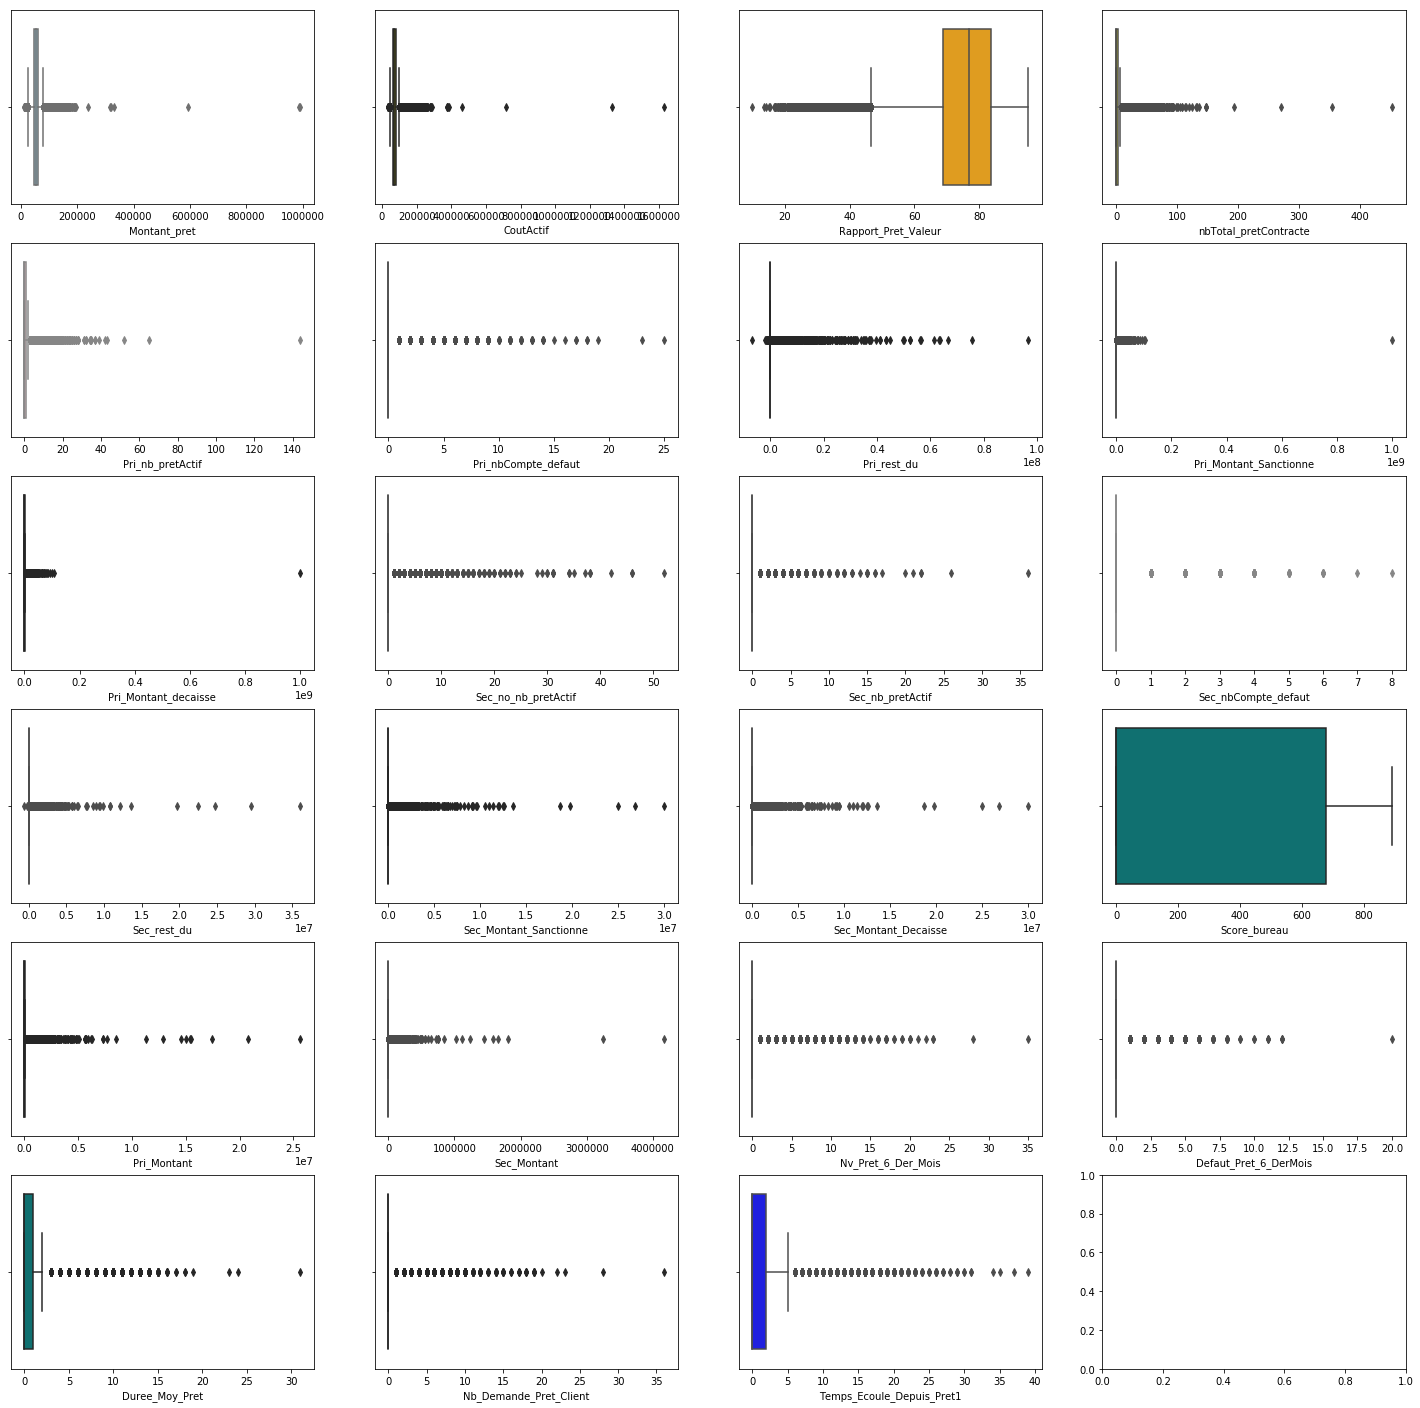

In [34]:
f, axes = plt.subplots(6,4, figsize=(25,25))
sns.boxplot( x= df_quanti["Montant_pret"] , color="skyblue", ax=axes[0, 0])
sns.boxplot(x= df_quanti["CoutActif"] , color="olive", ax=axes[0, 1])
sns.boxplot(x= df_quanti["Rapport_Pret_Valeur"] , color="orange", ax=axes[0, 2])
sns.boxplot( x=df_quanti["nbTotal_pretContracte"] , color="yellow", ax=axes[0, 3])

sns.boxplot( x = df_quanti["Pri_nb_pretActif"] , color="pink",  ax=axes[1, 0])
sns.boxplot( x = df_quanti["Pri_nbCompte_defaut"] , color="gold",  ax=axes[1, 1])
sns.boxplot( x=df_quanti["Pri_rest_du"] , color="teal",  ax=axes[1, 2])
sns.boxplot(x= df_quanti['Pri_Montant_Sanctionne'], color="blue",  ax=axes[1, 3])

sns.boxplot( x= df_quanti['Pri_Montant_decaisse'], color="green",  ax=axes[2, 0])
sns.boxplot( x=df_quanti["Sec_no_nb_pretActif"] , color="orange", ax=axes[2, 1])
sns.boxplot( x=df_quanti["Sec_nb_pretActif"] , color="yellow", ax=axes[2, 2])
sns.boxplot( x= df_quanti["Sec_nbCompte_defaut"] , color="pink",  ax=axes[2, 3])

sns.boxplot( x= df_quanti["Sec_rest_du"] , color="gold",  ax=axes[3, 0])
sns.boxplot( x= df_quanti["Sec_Montant_Sanctionne"] , color="teal",  ax=axes[3, 1])
sns.boxplot( x= df_quanti['Sec_Montant_Decaisse'], color="blue",  ax=axes[3, 2])

sns.boxplot( x= df_quanti['Score_bureau'], color="teal",  ax=axes[3, 3])


sns.boxplot( x= df_quanti['Pri_Montant'], color="green", ax=axes[4, 0])
sns.boxplot( x= df_quanti["Sec_Montant"] , color="yellow",  ax=axes[4, 1])
sns.boxplot( x=df_quanti["Nv_Pret_6_Der_Mois"] , color="orange", ax=axes[4, 2])
sns.boxplot( x=df_quanti["Defaut_Pret_6_DerMois"] , color="gold",  ax=axes[4, 3])

sns.boxplot( x=df_quanti["Duree_Moy_Pret"] , color="teal",  ax=axes[5, 0])
sns.boxplot(x= df_quanti['Temps_Ecoule_Depuis_Pret1'], color="blue",  ax=axes[5, 2])
sns.boxplot(x= df_quanti['Nb_Demande_Pret_Client'], color="green",  ax=axes[5, 1])


### Traitement des valeurs extremes

La présence de quelques valeurs extrêmes exerce une forte influence sur les estimés produits par les méthodes de prédiction et rend difficile la détection des effets représentés par la plus grande partie des données.

En effet, plusieurs algorithmes de Machine Learning sont sensibles aux données d’entrainement ainsi qu’ à leurs distributions. 
Avoir des Outliers dans Training Set d’un algorithme de Machine Learning peut rendre la phase d’entrainement plus longue. 
Sans mentionner que l’apprentissage sera biaisé. Par conséquent, le modèle prédictif produit ne sera pas performant, ou du moins, loin d’être optimal.

Bien avant la phase d’apprentissage, les valeurs aberrantes influencent certains paramètres statistiques, comme la moyenne. 
Cela peut fausser notre compréhension du jeu de données et nous conduire à émettre des hypothèses erronées sur ce dernier. 
Détecter ses Outliers et les traiter nous permettra de faire des suppositions plus aguerries

Pour se faire nous allons utiliser la **winsorization** qui va consister à limiter l'impact de ces dernières

In [11]:
#Copie du df et selection des variables concernées uniquement
copy_df_quanty_only = df_quanti.copy()
cols = ["Montant_pret",
"CoutActif",
"Rapport_Pret_Valeur",
"nbTotal_pretContracte",
"Pri_nb_pretActif",
"Pri_rest_du",
"Pri_Montant_Sanctionne",
"Pri_Montant_decaisse",
"Sec_Montant_Sanctionne",
"Sec_Montant_Decaisse",
"Pri_Montant",
"Duree_Moy_Pret",
"Temps_Ecoule_Depuis_Pret1"
]

In [12]:
#Creation fonction pour winsorization
from scipy.stats.mstats import winsorize
def winsorization (df, cols, dep_limite_inf, dep_limite_sup):
    for col in cols:
        
        #limite_inf = df[col].quantile(dep_limite_inf)
        #limite_sup = df[col].quantile(1-dep_limite_sup)
        
        #df[col] = np.where(df[col]>limite_sup,limite_sup, 
                  #np.where(df[col]<limite_inf,limite_inf,df[col]))
        
        winsorize(a=df[col], limits =(dep_limite_inf, dep_limite_sup), inplace=True)

In [37]:
#Application de la fonction avec comme limite inférieure : 1% et superieure 99%

winsorization(copy_df_quanty_only, cols, 0.01, 0.01)
#Describe Avant / Apres
df_quanti.describe().T
copy_df_quanty_only.describe().T

,count,mean,std,min,25%,50%,75%,max
Montant_pret,233153.0,54282.097614,12042.654269,26529.00,47145.00,53803.0,60413.00,95391.00
CoutActif,233153.0,75711.336993,17449.216206,47099.00,65717.00,70946.0,79202.00,156016.00
Rapport_Pret_Valeur,233153.0,74.790936,11.223469,39.25,68.88,76.8,83.67,89.95
nbTotal_pretContracte,233153.0,2.324495,4.201104,0.00,0.00,0.0,3.00,23.00
Pri_nb_pretActif,233153.0,1.011040,1.731850,0.00,0.00,0.0,1.00,9.00
Pri_nbCompte_defaut,233153.0,0.156550,0.548788,0.00,0.00,0.0,0.00,25.00
Pri_rest_du,233153.0,132896.691319,430689.872567,0.00,0.00,0.0,35008.00,2918256.00
Pri_Montant_Sanctionne,233153.0,173889.479385,520967.734469,0.00,0.00,0.0,62500.00,3468588.00
Pri_Montant_decaisse,233153.0,173041.232024,519823.884613,0.00,0.00,0.0,60800.00,3458000.00
Sec_no_nb_pretActif,233153.0,0.059081,0.626796,0.00,0.00,0.0,0.00,52.00


C:\Users\berni\Nouveau dossier (4)\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


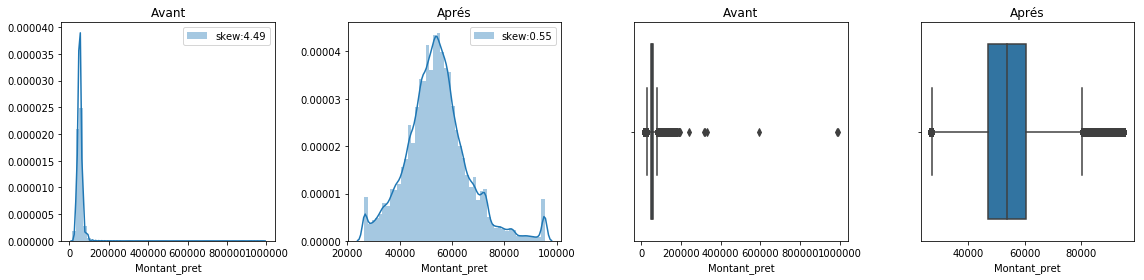

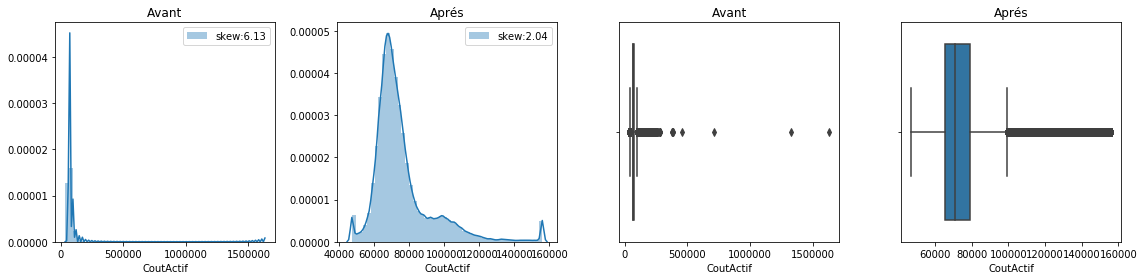

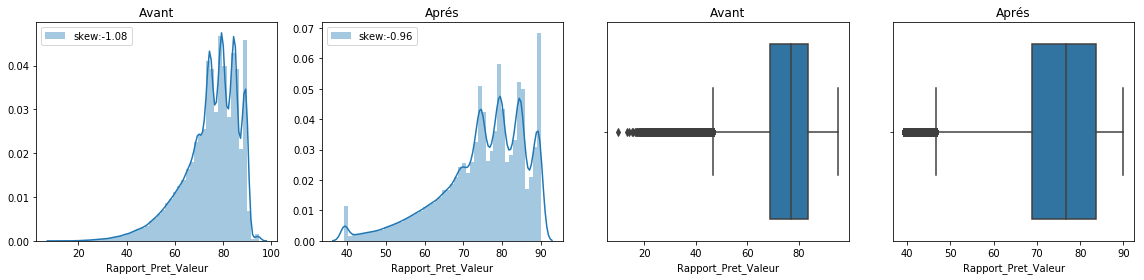

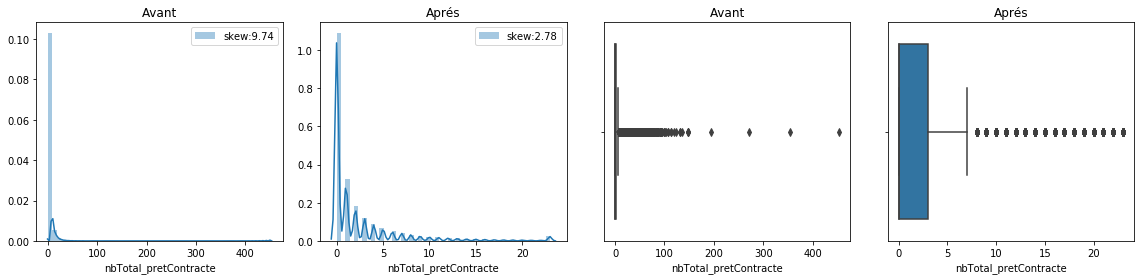

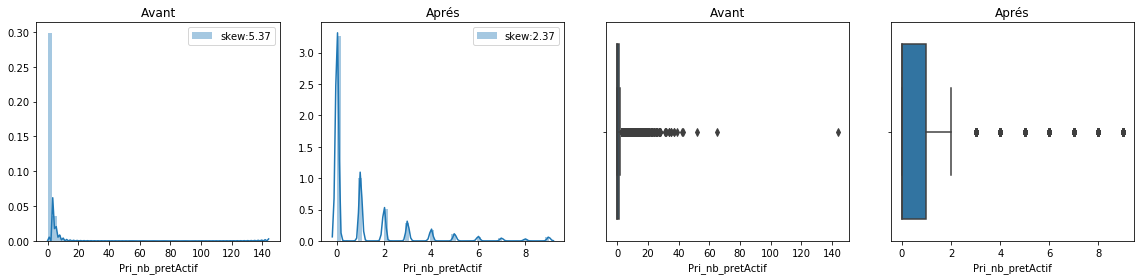

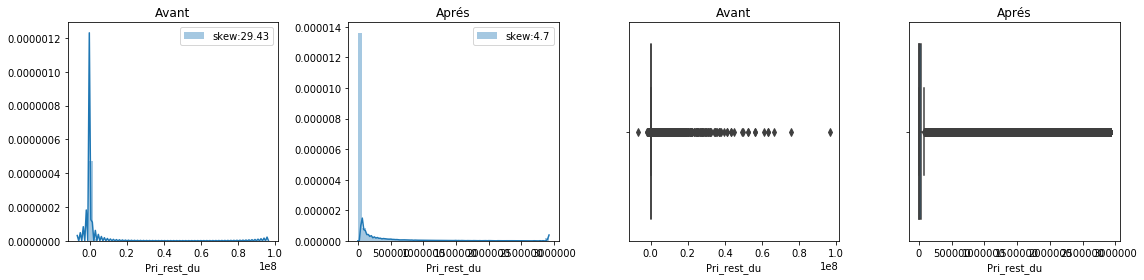

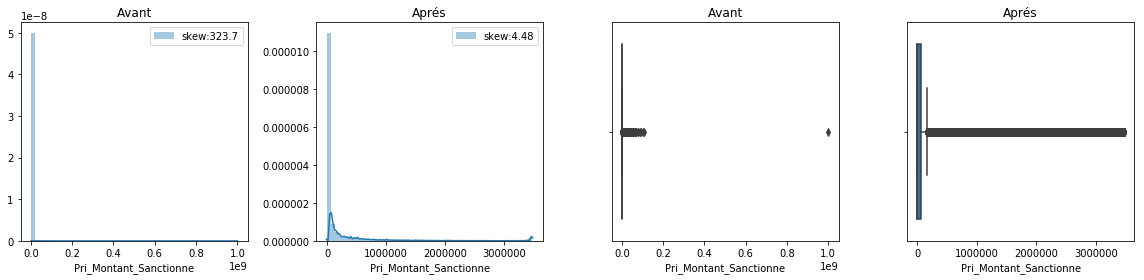

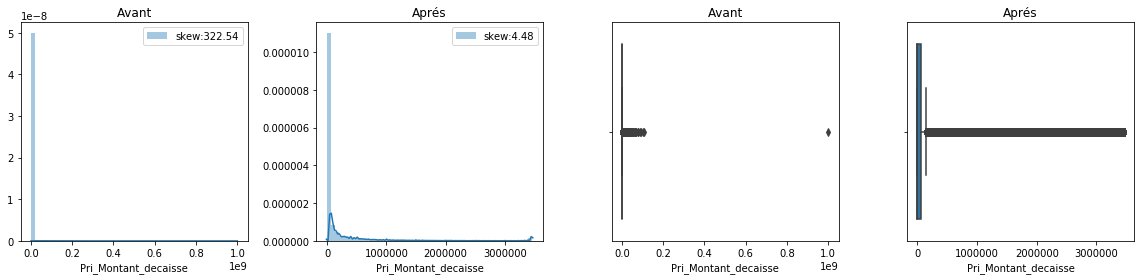

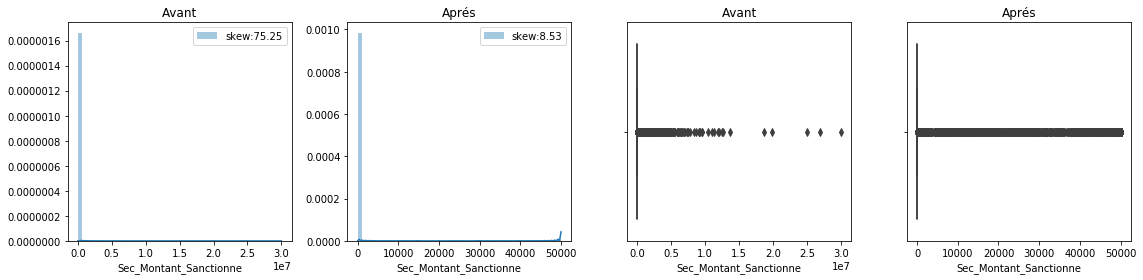

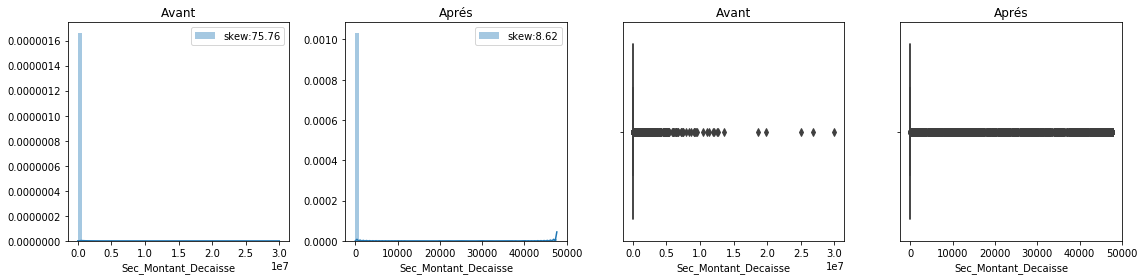

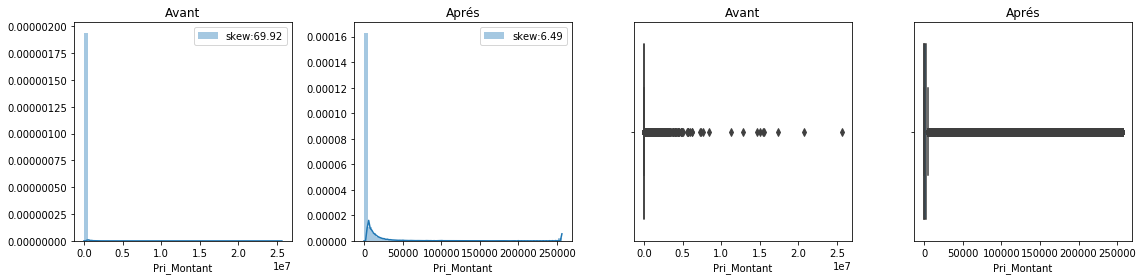

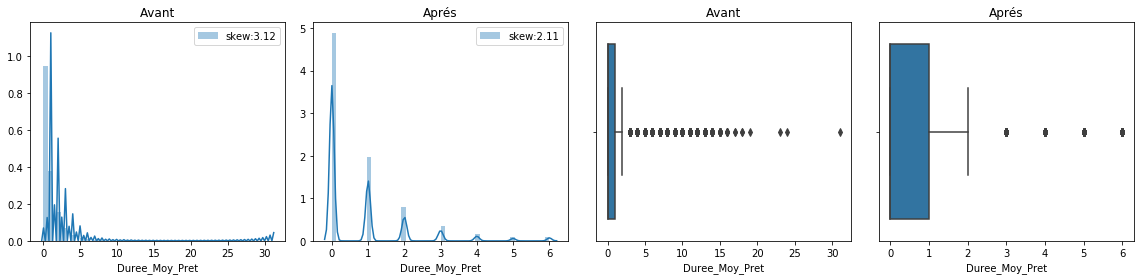

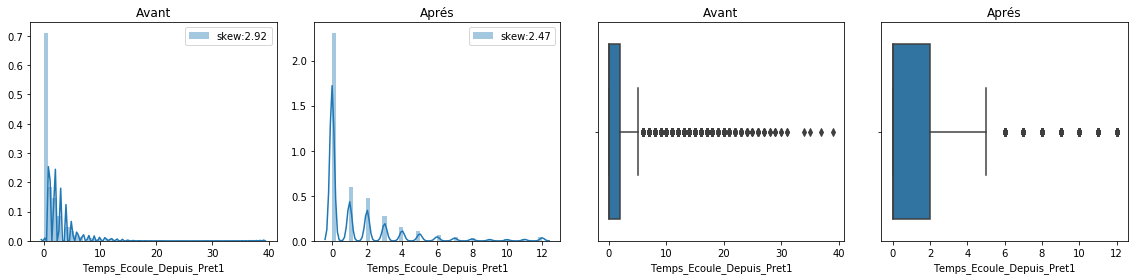

In [38]:
#Visualisation avant après à l'aide d'élements graphiques
for col in cols:
	plt.figure(figsize=(16,4))

	plt.subplot(141)
	sns.distplot(df_quanti[col], label="skew:"+str(np.round(df_quanti[col].skew(),2)))
	plt.title('Avant')
	plt.legend()

	plt.subplot(142)
	sns.distplot(copy_df_quanty_only[col], label="skew:"+str(np.round(copy_df_quanty_only[col].skew(),2)))
	plt.title('Aprés')
	plt.legend()


	plt.subplot(143)
	sns.boxplot(df_quanti[col])
	plt.title('Avant')
	

	plt.subplot(144)
	sns.boxplot(copy_df_quanty_only[col])
	plt.title('Aprés')

	plt.tight_layout()
	plt.show()

In [39]:
copy_df_quanty_only.shape

(233153, 24)

Nous pouvons constater que la winsorization a fortement modifié notre jeux de données d'origine, nous nous interregeons sur le bien fondé d'une telle intervention. Sachant ces données extremement sensibles et ne disposant d'aucune directive du métier sur l'integration ou non des ces valeurs réeles mais atypiques dans notre modèle. 
Nous ferons le choix d'exploiter celles ci et de conserver ainsi notre jeu de données initial. 

### Analyse Bivariée des variables quantitatives

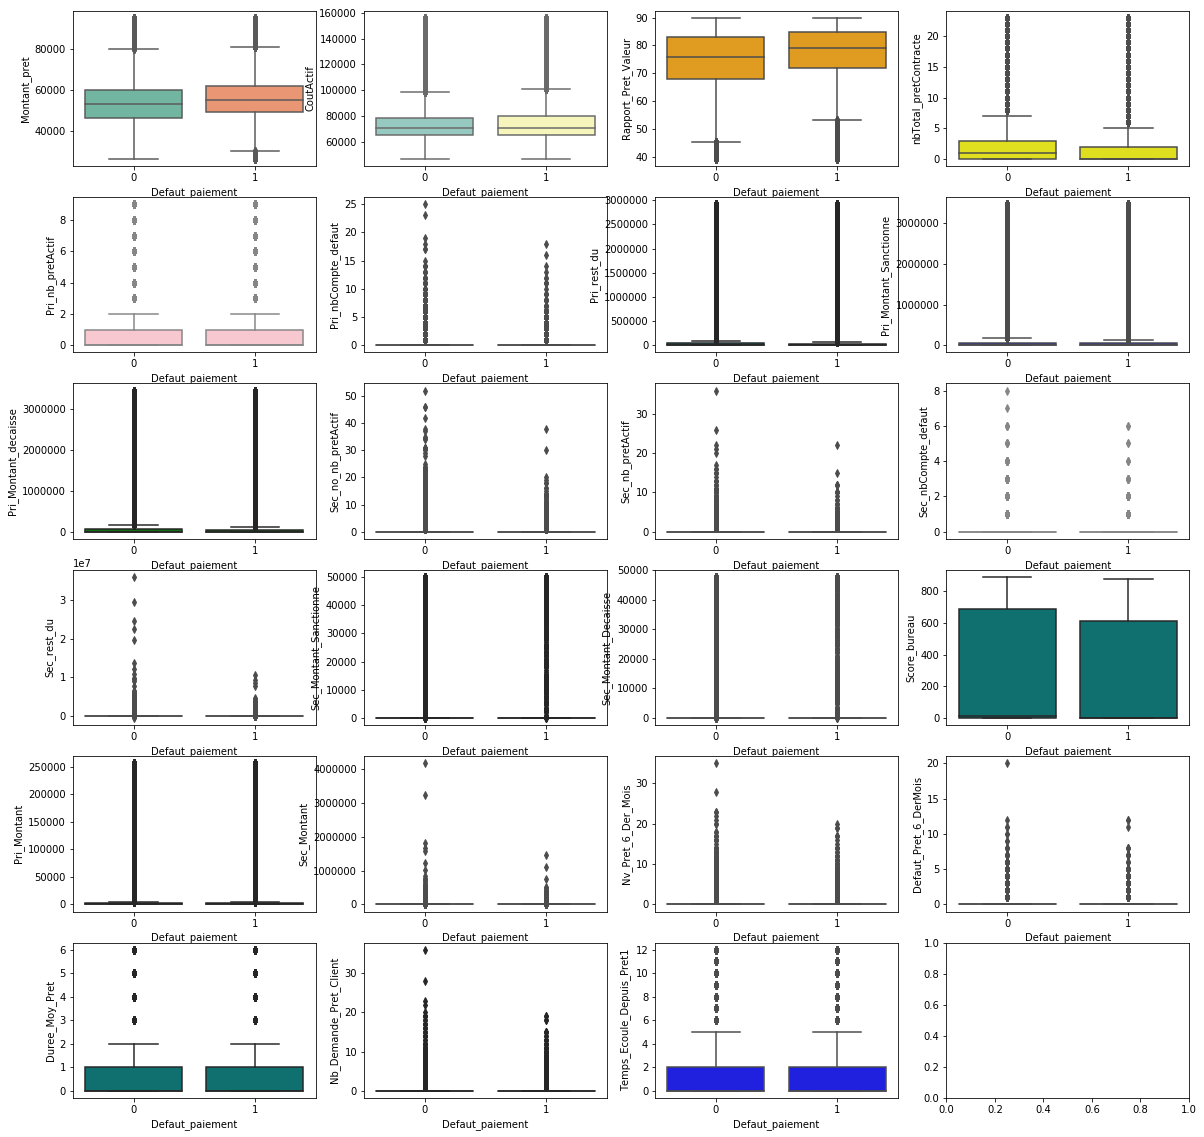

In [43]:
f, axes = plt.subplots(6,4, figsize=(20,20))
sns.boxplot( y = copy_df_quanty_only["Montant_pret"], x = copy_df_quanty_only["Defaut_paiement"] , palette = 'Set2', ax =axes[0, 0])
sns.boxplot(y = copy_df_quanty_only["CoutActif"] , x = copy_df_quanty_only["Defaut_paiement"] , palette = "Set3", ax =axes[0, 1])
sns.boxplot(y = copy_df_quanty_only["Rapport_Pret_Valeur"] , x = copy_df_quanty_only["Defaut_paiement"] ,  color="orange", ax =axes[0, 2])
sns.boxplot( y =copy_df_quanty_only["nbTotal_pretContracte"] , x = copy_df_quanty_only["Defaut_paiement"] ,  color="yellow", ax =axes[0, 3])

sns.boxplot( y = copy_df_quanty_only["Pri_nb_pretActif"] , x = copy_df_quanty_only["Defaut_paiement"] ,  color="pink",  ax =axes[1, 0])
sns.boxplot( y = copy_df_quanty_only["Pri_nbCompte_defaut"] , x = copy_df_quanty_only["Defaut_paiement"] ,  color="gold",  ax =axes[1, 1])
sns.boxplot( y =copy_df_quanty_only["Pri_rest_du"] , x = copy_df_quanty_only["Defaut_paiement"] , color="teal",  ax =axes[1, 2])
sns.boxplot(y = copy_df_quanty_only['Pri_Montant_Sanctionne'], x = copy_df_quanty_only["Defaut_paiement"] , color="blue",  ax =axes[1, 3])

sns.boxplot( y = copy_df_quanty_only['Pri_Montant_decaisse'], x = copy_df_quanty_only["Defaut_paiement"] , color="green",  ax =axes[2, 0])
sns.boxplot( y =copy_df_quanty_only["Sec_no_nb_pretActif"] , x = copy_df_quanty_only["Defaut_paiement"] , color="orange", ax =axes[2, 1])
sns.boxplot( y =copy_df_quanty_only["Sec_nb_pretActif"] , x = copy_df_quanty_only["Defaut_paiement"] ,  color="yellow", ax =axes[2, 2])
sns.boxplot( y = copy_df_quanty_only["Sec_nbCompte_defaut"] , x = copy_df_quanty_only["Defaut_paiement"] ,  color="pink",  ax =axes[2, 3])

sns.boxplot( y = copy_df_quanty_only["Sec_rest_du"] , x = copy_df_quanty_only["Defaut_paiement"] ,  color="gold",  ax =axes[3, 0])
sns.boxplot( y = copy_df_quanty_only["Sec_Montant_Sanctionne"] , x = copy_df_quanty_only["Defaut_paiement"] ,  color="teal",  ax =axes[3, 1])
sns.boxplot( y = copy_df_quanty_only['Sec_Montant_Decaisse'], x = copy_df_quanty_only["Defaut_paiement"] , color="blue",  ax =axes[3, 2])

sns.boxplot( y= copy_df_quanty_only['Score_bureau'],x = copy_df_quanty_only["Defaut_paiement"], color="teal",  ax=axes[3, 3])

sns.boxplot( y = copy_df_quanty_only['Pri_Montant'], x = copy_df_quanty_only["Defaut_paiement"] ,  color="green", ax =axes[4, 0])
sns.boxplot( y = copy_df_quanty_only["Sec_Montant"] , x = copy_df_quanty_only["Defaut_paiement"] ,  color="yellow",  ax =axes[4, 1])
sns.boxplot( y =copy_df_quanty_only["Nv_Pret_6_Der_Mois"] , x = copy_df_quanty_only["Defaut_paiement"] , color="orange", ax =axes[4, 2])
sns.boxplot( y =copy_df_quanty_only["Defaut_Pret_6_DerMois"] , x = copy_df_quanty_only["Defaut_paiement"] ,  color="gold",  ax =axes[4, 3])

sns.boxplot( y =copy_df_quanty_only["Duree_Moy_Pret"] , x = copy_df_quanty_only["Defaut_paiement"] ,color="teal",  ax =axes[5, 0])
sns.boxplot(y = copy_df_quanty_only['Temps_Ecoule_Depuis_Pret1'], x = copy_df_quanty_only["Defaut_paiement"] , color="blue",  ax =axes[5, 2])
sns.boxplot(y = copy_df_quanty_only['Nb_Demande_Pret_Client'], x = copy_df_quanty_only["Defaut_paiement"] , color="green",  ax =axes[5, 1])


Les boites à moustache mettent en évidence la liaison entre la variable cible et les variables explicatives. 
Dans le cas de chevauchement de ces dernières, on peut penser que la relation est faible voire nulle. 
Dans le cas présent, la globalité de nos variables explicatives présentent des boîtes à moustaches similaires. 
Par exemple, pour duree_moy_pret et teps_ecoule_depuis_pret1 on constate bien du chevauchement, on peut en effet immédiatement observer que l'intervalle interquartile est identique qu'elle que soit la modalité pour chacune des variables. 

En revanche, pour la variable montant_pret on observe que la mediane différe légerement pour les 2 modalités.
On peut présumer que cette variable pourrait potentiellement expliquer le modèle. 

### Analyse Bivariée des variables qualitatives 

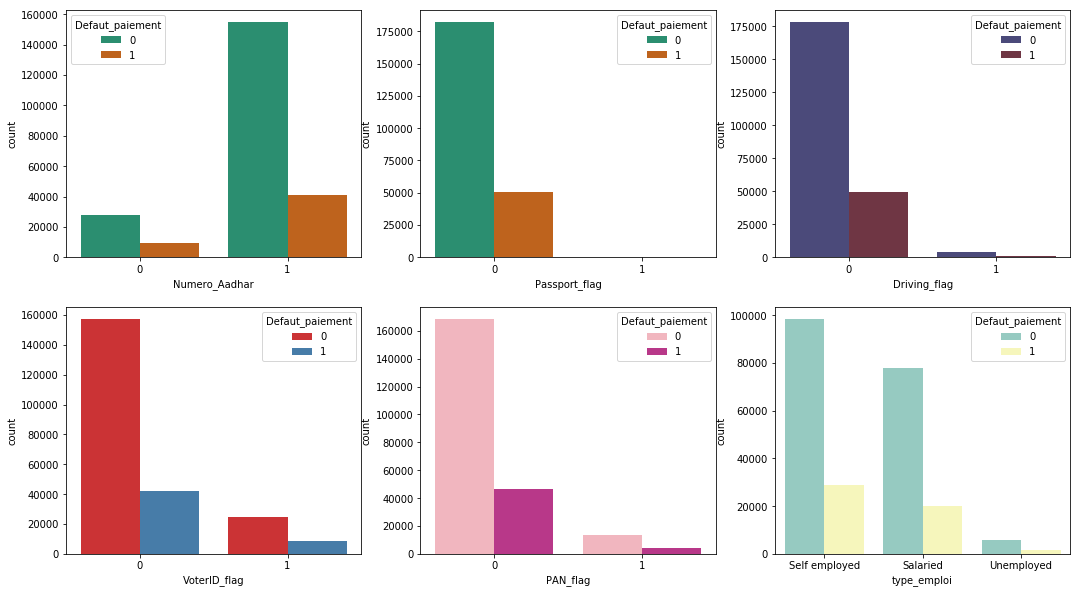

In [41]:
# variables 
f, axes = plt.subplots(2,3,figsize =(18,10)) 
sns.countplot(x = df_quali['Numero_Aadhar'],hue = 'Defaut_paiement', data = df_quali, palette = 'Dark2',ax = axes[0,0])
sns.countplot(x = df_quali['Passport_flag'],hue = 'Defaut_paiement', data = df_quali, palette = 'Dark2',ax = axes[0,1])
sns.countplot(x = df_quali['Driving_flag'],hue = 'Defaut_paiement', data = df_quali, palette = 'icefire',ax = axes[0,2])
sns.countplot(x = df_quali['PAN_flag'],hue = 'Defaut_paiement', data = df_quali, palette = 'RdPu',ax = axes[1,1])
sns.countplot(x = df_quali['VoterID_flag'],hue = 'Defaut_paiement', data = df_quali, palette = 'Set1',ax = axes[1,0])
sns.countplot(x = df_quali['type_emploi'], hue = 'Defaut_paiement',data = df_quali, palette = 'Set3', ax = axes[1,2])

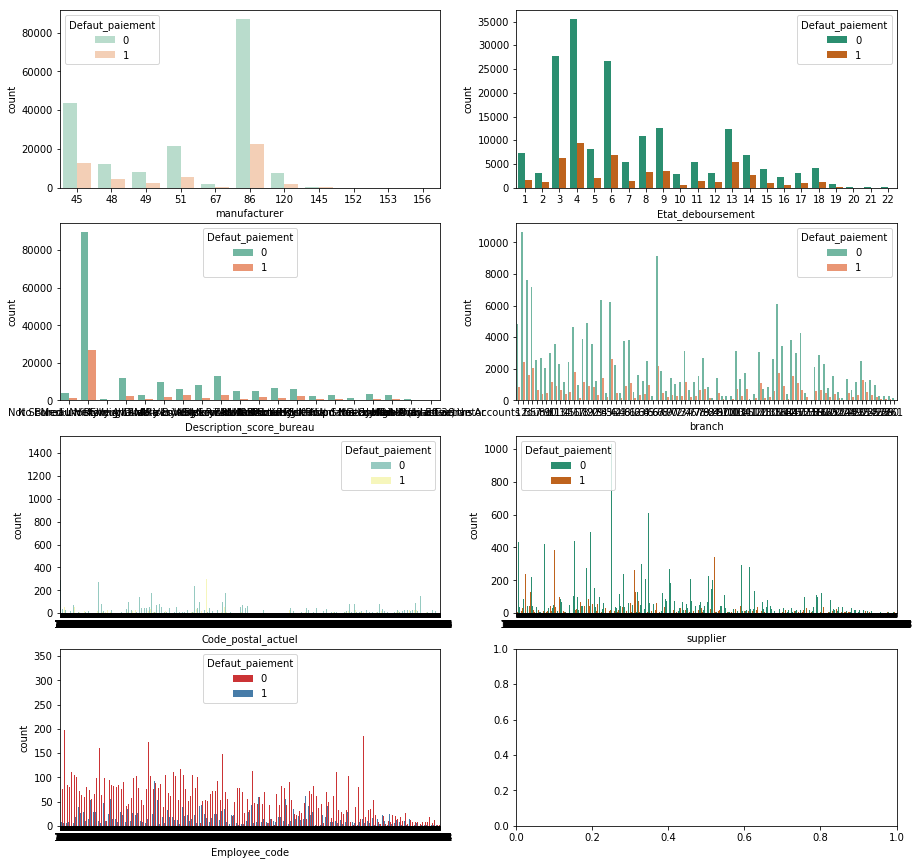

In [42]:
## Analyse bivariée variables catégorielles
f, axes = plt.subplots(4,2,figsize = (15,15))
sns.countplot(x = df_quali['manufacturer'],hue = 'Defaut_paiement', data = df_quali, palette = 'Pastel2', ax =axes[0,0])
sns.countplot(x = df_quali['Etat_deboursement'],hue = 'Defaut_paiement', data = df_quali, palette = 'Dark2', ax =axes[0,1])
sns.countplot(x = df_quali['Description_score_bureau'],hue = 'Defaut_paiement', data = df_quali, palette = 'Set2', ax =axes[1,0])
sns.countplot(x = df_quali['branch'],hue = 'Defaut_paiement', data = df_quali, palette = 'Set2', ax =axes[1,1])
sns.countplot(x = df_quali['supplier'],hue = 'Defaut_paiement', data = df_quali, palette = 'Dark2', ax =axes[2,1])
sns.countplot(x = df_quali['Code_postal_actuel'],hue = 'Defaut_paiement', data = df_quali, palette = 'Set3', ax =axes[2,0])
sns.countplot(x = df_quali['Employee_code'], hue = 'Defaut_paiement',data = df_quali, palette = 'Set1', ax =axes[3,0])

Les graphiques ne mettent pas évidence un lien significatif entre la variable cible et les variables explicatives. 

La proportion de personnes en défaut de paiement différe légèrement, en effet on note que les auto autrepreneurs sont plus à risques que les salariés. Par contre, concernant les personnes sans profession le risque est nettement plus faible. 
On note que les personnes ayant fournis des informations administratives les concernant (passeport, permis de conduire, electeur, pan ...) sont de manière globale ne sont pas en défaut de paiement. 

### Suppression des variables non nécessaires pour la construction du modèle comme  la variable id

In [13]:
data = data.drop(['ID', 'supplier','Code_postal_actuel', 'Employee_code'], axis = 1)
# checking the new columns of data
data.columns

Index(['Montant_pret', 'CoutActif', 'Rapport_Pret_Valeur', 'branch',
       'manufacturer', 'type_emploi', 'Etat_deboursement', 'Numero_Aadhar',
       'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag',
       'Score_bureau', 'Description_score_bureau', 'nbTotal_pretContracte',
       'Pri_nb_pretActif', 'Pri_nbCompte_defaut', 'Pri_rest_du',
       'Pri_Montant_Sanctionne', 'Pri_Montant_decaisse', 'Sec_no_nb_pretActif',
       'Sec_nb_pretActif', 'Sec_nbCompte_defaut', 'Sec_rest_du',
       'Sec_Montant_Sanctionne', 'Sec_Montant_Decaisse', 'Pri_Montant',
       'Sec_Montant', 'Nv_Pret_6_Der_Mois', 'Defaut_Pret_6_DerMois',
       'Duree_Moy_Pret', 'Temps_Ecoule_Depuis_Pret1', 'Nb_Demande_Pret_Client',
       'Defaut_paiement'],
      dtype='object')

### Regroupement des modalités des variables catégorielles à plusieurs modalités 

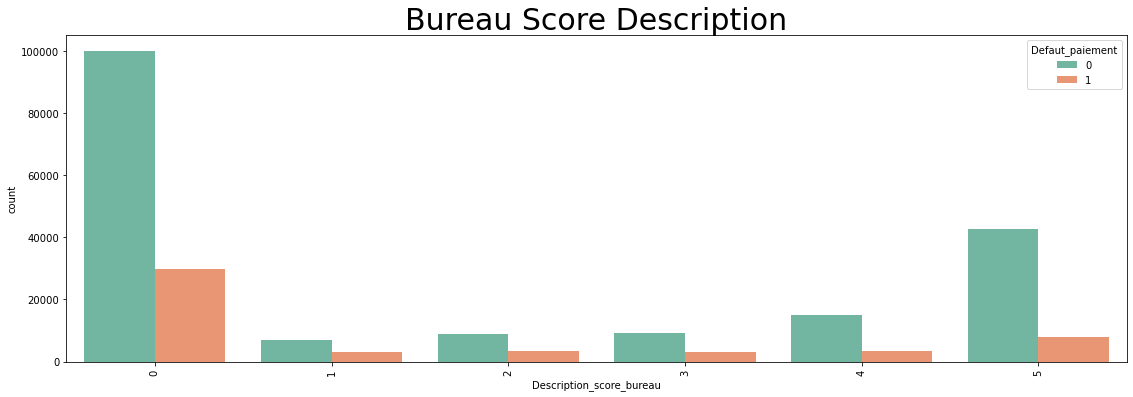

In [50]:
plt.rcParams['figure.figsize'] = (19, 6)
sns.countplot(data['Description_score_bureau'],hue = 'Defaut_paiement',data= data, palette = 'Set2')
plt.title('Bureau Score Description', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

In [14]:
# encodings for bureau score(perform cns score distribution)
data['Description_score_bureau'] = data['Description_score_bureau'].replace('No Bureau History Available', 0)
data['Description_score_bureau'] = data['Description_score_bureau'].replace('Not Scored: Sufficient History Not Available', 0)
data['Description_score_bureau'] = data['Description_score_bureau'].replace('Not Scored: Not Enough Info available on the customer', 0)
data['Description_score_bureau'] = data['Description_score_bureau'].replace('Not Scored: No Activity seen on the customer (Inactive)',0)
data['Description_score_bureau'] = data['Description_score_bureau'].replace('Not Scored: No Updates available in last 36 ths', 0)
data['Description_score_bureau'] = data['Description_score_bureau'].replace('Not Scored: Only a Guarantor', 0)
data['Description_score_bureau'] = data['Description_score_bureau'].replace('Not Scored: More than 50 active Accounts found',0)
data['Description_score_bureau'] = data['Description_score_bureau'].replace('M-Very High Risk', 1)
data['Description_score_bureau'] = data['Description_score_bureau'].replace('L-Very High Risk', 1)
data['Description_score_bureau'] = data['Description_score_bureau'].replace('K-High Risk', 2)
data['Description_score_bureau'] = data['Description_score_bureau'].replace('J-High Risk', 2)
data['Description_score_bureau'] = data['Description_score_bureau'].replace('I-Medium Risk', 3)
data['Description_score_bureau'] = data['Description_score_bureau'].replace('H-Medium Risk', 3)
data['Description_score_bureau'] = data['Description_score_bureau'].replace('G-Low Risk', 4)
data['Description_score_bureau'] = data['Description_score_bureau'].replace('F-Low Risk', 4)
data['Description_score_bureau'] = data['Description_score_bureau'].replace('E-Low Risk', 4)
data['Description_score_bureau'] = data['Description_score_bureau'].replace('D-Very Low Risk', 5)
data['Description_score_bureau'] = data['Description_score_bureau'].replace('C-Very Low Risk', 5)
data['Description_score_bureau'] = data['Description_score_bureau'].replace('B-Very Low Risk', 5)
data['Description_score_bureau'] = data['Description_score_bureau'].replace('A-Very Low Risk', 5)

# checing the values in bureau score
data['Description_score_bureau'].value_counts()


0    129784
5     50728
4     18294
3     12412
2     12025
1      9910
Name: Description_score_bureau, dtype: int64

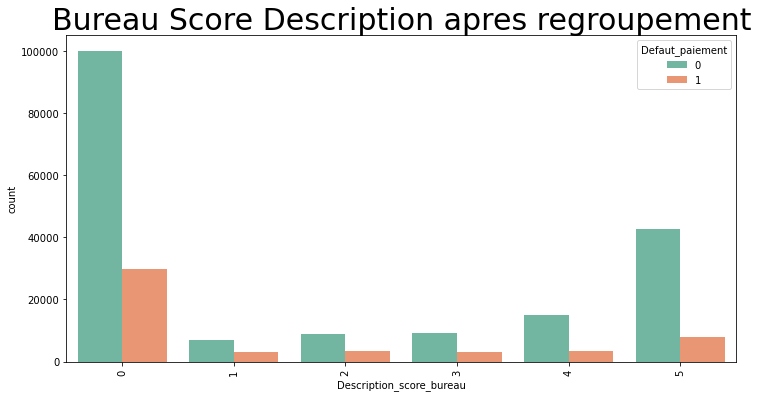

In [52]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.countplot(data['Description_score_bureau'],hue = 'Defaut_paiement',data= data, palette = 'Set2')
plt.title('Bureau Score Description apres regroupement', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

 ### Test d'indépendance de Khi deux  et de  V Cramer  entre les variables qualitatives

Le test du Khi2 permet de savoir si les variables entretiennent une relation, avec un degré de certitude plus ou moins grand. 
Par contre, il ne renseigne pas sur l’intensité de cette relation. 

Le v de Cramer est une mesure issue qui se base sur le test du KHI-2 qui varie entre 0 (absence de liaison) et 1 (liaison parfaite)

In [50]:
liste = ['branch','manufacturer',
       'type_emploi', 'Etat_deboursement', 'Numero_Aadhar',
       'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag',
       'Description_score_bureau', 'Defaut_paiement']
df_quali = data[liste]
df_quali.columns

Index(['branch', 'manufacturer', 'type_emploi', 'Etat_deboursement',
       'Numero_Aadhar', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
       'Passport_flag', 'Description_score_bureau', 'Defaut_paiement'],
      dtype='object')

In [51]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_quali = pd.DataFrame() 

for i in df_quali.columns :
    data_quali[i]=label.fit_transform(df_quali[i])

df_quali = data_quali.copy()

In [52]:
from scipy.stats import chi2_contingency
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))


rows= []

for var1 in df_quali:
  col = []
  for var2 in df_quali :
        cramers =cramers_V(df_quali[var1], df_quali[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)


cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = df_quali.columns, index =df_quali.columns)
df

,branch,manufacturer,type_emploi,Etat_deboursement,Numero_Aadhar,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,Description_score_bureau,Defaut_paiement
branch,1.00,0.04,0.09,0.82,0.40,0.17,0.37,0.02,0.00,0.01,0.01
manufacturer,0.04,1.00,0.01,0.02,0.01,0.01,0.01,0.00,0.00,0.00,0.00
type_emploi,0.09,0.01,1.00,0.07,0.01,0.00,0.01,0.00,0.00,0.00,0.00
Etat_deboursement,0.82,0.02,0.07,1.00,0.38,0.14,0.34,0.02,0.00,0.01,0.01
Numero_Aadhar,0.40,0.01,0.01,0.38,1.00,0.04,0.76,0.08,0.01,0.00,0.00
PAN_flag,0.17,0.01,0.00,0.14,0.04,1.00,0.03,0.00,0.00,0.00,0.00
VoterID_flag,0.37,0.01,0.01,0.34,0.76,0.03,1.00,0.00,0.00,0.01,0.00
Driving_flag,0.02,0.00,0.00,0.02,0.08,0.00,0.00,1.00,0.00,0.00,0.00
Passport_flag,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,1.00,0.00,0.00
Description_score_bureau,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,1.00,0.01



On peut constater que pour la majorité de nos variables l'intensité de la relation est faible voire nulle.

On note également la présence de quelques relations fortes mais que nous ne pouvons commenter par faute d'informations complémentaires (ex etat_remboursement pour lequel nous n'avons pas de descriptif des modalités et branch)

Quelques liens évidents comme le PAN_Flag et le numeor_aadhar ou le voterID Flag.

Enfin notons que les relations sont faibles voire nulles avec notre variable cible [valeur comprise entre 0 et 0.10]

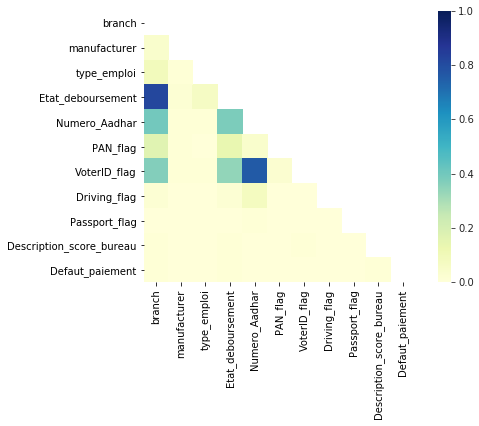

In [53]:
f, ax = plt.subplots(figsize=(8, 5))
mask = np.zeros_like(df, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True, cmap="YlGnBu")

plt.show()

#### Test d'indépendance entre variable cible et variables qualitatives

In [54]:
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

rows= []

for var1 in df_quali:
    col = []
    cramers =cramers_V(df_quali[var1], df_quali['Defaut_paiement']) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)


cramers_results = np.array(rows)
cramers_results

array([[0.01],
       [0.  ],
       [0.  ],
       [0.01],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.01],
       [1.  ]])

In [232]:
def pvalue(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[1] # Keeping of the test statistic of the Chi2 test
    return stat


rows =[]
for var1 in df_quali:
    col = []
    Khi_deux = pvalue(df_quali[var1], df_quali['Defaut_paiement']) # Cramer's V test
    col.append(Khi_deux) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)

p_value = pd.DataFrame(rows,index =[df_quali.columns])
p_value

,0
branch,0.000000e+00
manufacturer,1.506471e-93
type_emploi,3.176517e-42
Etat_deboursement,0.000000e+00
Numero_Aadhar,1.191085e-89
PAN_flag,3.279291e-01
VoterID_flag,5.660183e-99
Driving_flag,5.198653e-03
Passport_flag,2.987465e-04
Description_score_bureau,0.000000e+00


In [236]:
df= pd.DataFrame(cramers_results, index = df_quali.columns)
df

,0
branch,0.01
manufacturer,0.00
type_emploi,0.00
Etat_deboursement,0.01
Numero_Aadhar,0.00
PAN_flag,0.00
VoterID_flag,0.00
Driving_flag,0.00
Passport_flag,0.00
Description_score_bureau,0.01


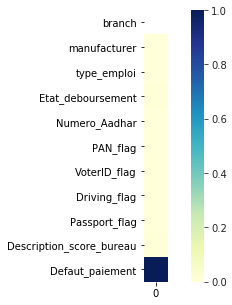

In [237]:
f, ax = plt.subplots(figsize=(8, 5))
mask = np.zeros_like(df, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True, cmap="YlGnBu")

plt.show()

## Correlation entre les variables quantitatives

Les diagrammes de dispersions vont nous permettre d'identifier visuellement l'existence de relation entre un couple de variable. 

Nous nous interrogerons par exemple sur le possible effet d'un défaut de reglement sur les 6 derniers mois, ou d'un rapport pret valeur avec un risque élevé, ou d'une durée moyenne d'un pret importante sur le score attribué par le bureau.   


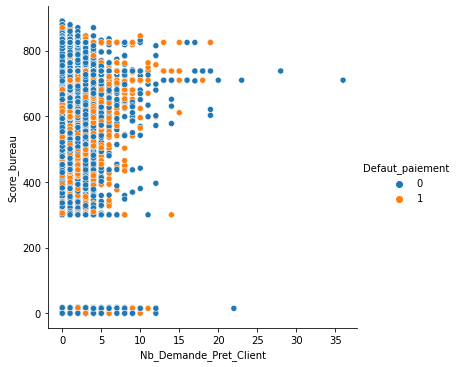

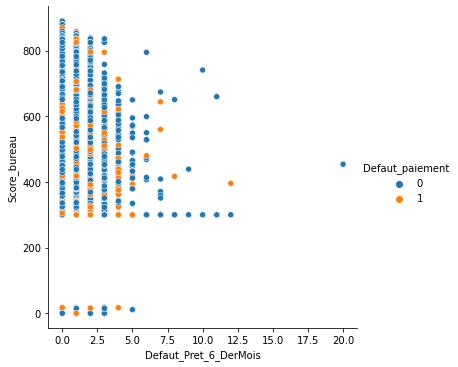

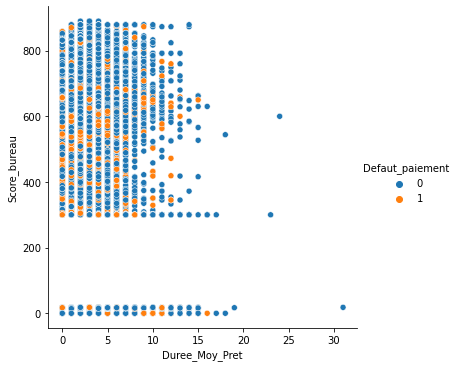

In [35]:
sns.relplot(x=df_quanti.Nb_Demande_Pret_Client, y=df_quanti.Score_bureau, hue=df_quanti.Defaut_paiement, data=df_quanti);
sns.relplot(x=df_quanti.Defaut_Pret_6_DerMois, y=df_quanti.Score_bureau, hue=df_quanti.Defaut_paiement, data=df_quanti);
sns.relplot(x=df_quanti.Duree_Moy_Pret, y=df_quanti.Score_bureau, hue=df_quanti.Defaut_paiement, data=df_quanti);




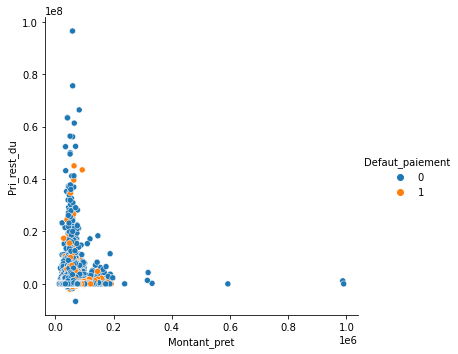

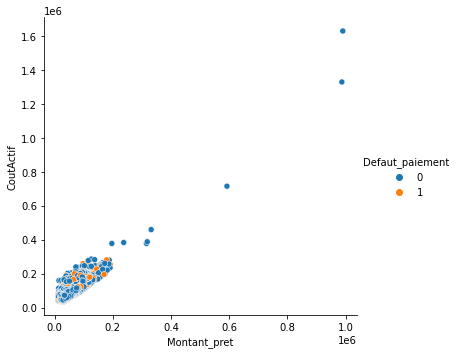

In [36]:
sns.relplot(x=df_quanti.Montant_pret, y=df_quanti.Pri_rest_du, hue=df_quanti.Defaut_paiement, data=df_quanti);
sns.relplot(x=df_quanti.Montant_pret, y=df_quanti.CoutActif, hue=df_quanti.Defaut_paiement, data=df_quanti);

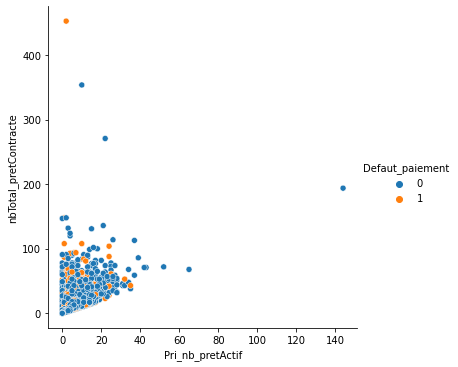

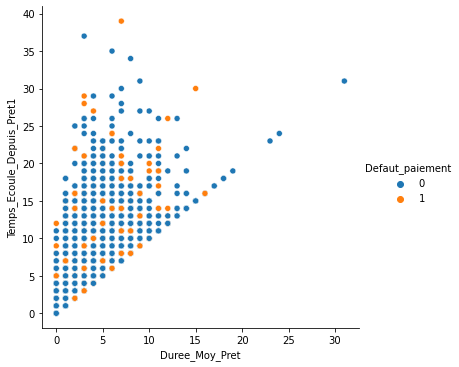

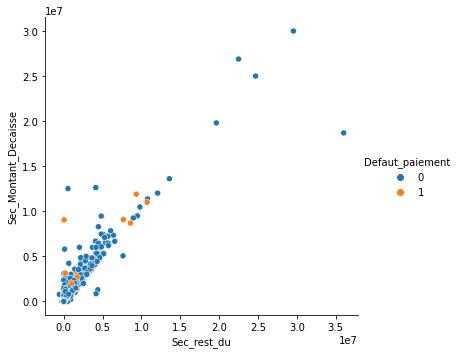

In [37]:
sns.relplot(x=df_quanti.Pri_nb_pretActif, y=df_quanti.nbTotal_pretContracte, hue=df_quanti.Defaut_paiement, data=df_quanti);
sns.relplot(x=df_quanti.Duree_Moy_Pret, y=df_quanti.Temps_Ecoule_Depuis_Pret1, hue=df_quanti.Defaut_paiement, data=df_quanti);
sns.relplot(x=df_quanti.Sec_rest_du, y=df_quanti.Sec_Montant_Decaisse, hue=df_quanti.Defaut_paiement, data=df_quanti);

Il ne semble pas avoir de lien significatif fort entre le score attribué par le bureau et les variables selectionnées.
Les autres liens que nous avons pu identifier semblent logiques pour le moment et n'apporte pas de commentaires particuliers. 
Pour plus de clarté, nous allons procéder à l'analyse de la correlation pour l'ensemble de nos variables quantititatives en produisant la matrice associée.

In [60]:
copy_df_quanty_only = copy_df_quanty_only.drop(columns = "Defaut_paiement", axis = 1)
copy_df_quanty_only.shape

(233153, 23)

In [61]:
data_new = pd.concat([df_quali, copy_df_quanty_only], axis=1)
data_new.columns

Index(['branch', 'manufacturer', 'type_emploi', 'Etat_deboursement',
       'Numero_Aadhar', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
       'Passport_flag', 'Description_score_bureau', 'Defaut_paiement',
       'Montant_pret', 'CoutActif', 'Rapport_Pret_Valeur',
       'nbTotal_pretContracte', 'Pri_nb_pretActif', 'Pri_nbCompte_defaut',
       'Pri_rest_du', 'Pri_Montant_Sanctionne', 'Pri_Montant_decaisse',
       'Sec_no_nb_pretActif', 'Sec_nb_pretActif', 'Sec_nbCompte_defaut',
       'Sec_rest_du', 'Sec_Montant_Sanctionne', 'Sec_Montant_Decaisse',
       'Pri_Montant', 'Sec_Montant', 'Nv_Pret_6_Der_Mois',
       'Defaut_Pret_6_DerMois', 'Duree_Moy_Pret', 'Temps_Ecoule_Depuis_Pret1',
       'Nb_Demande_Pret_Client', 'Score_bureau'],
      dtype='object')

Comme nous l'avions soulevé lors de la projection de nos diagrammes de dispersions les plus fortes correlations sont celles que l'on pourrait qualifier d'évidentes (Un nouveau pret dans les 6 derniers mois aura nécessairement une incidence sur le nombre de prets actifs ou le montant du pret et le coût actif)
Nous notons néanmois la présence de liens que l'on pourrait qualifier d'intensité moyenne entre les variables score bureau et nb total de prets contractés, le nombre de pretActif. 
Voir graphe ci dessous


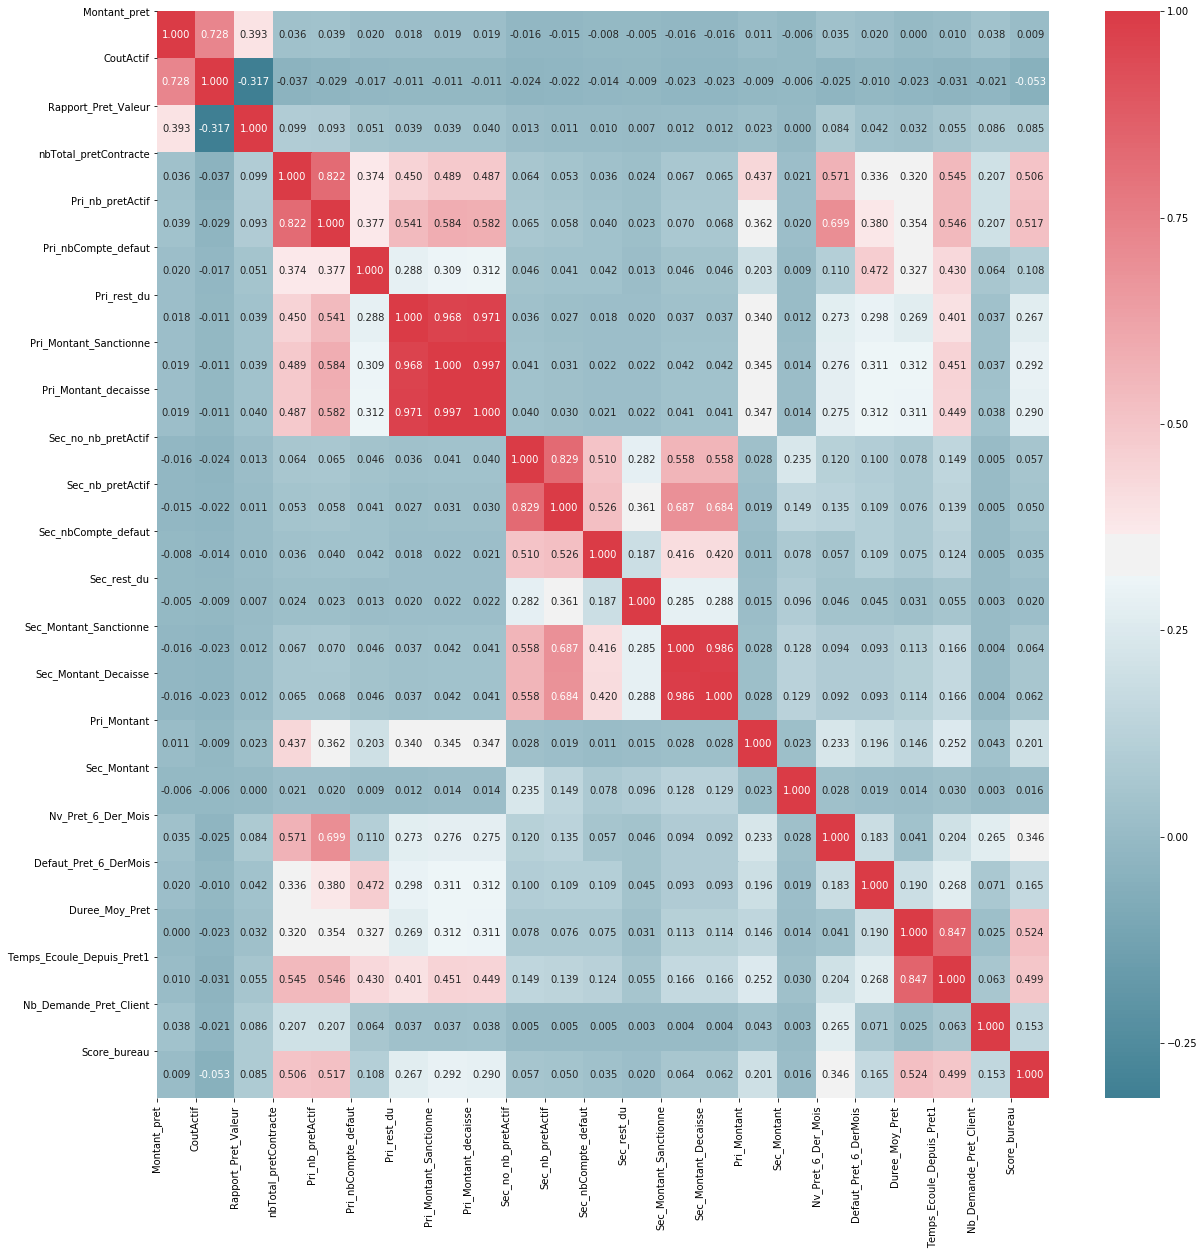

In [62]:
corr = copy_df_quanty_only.corr()
fig, ax = plt.subplots(figsize=(20,20))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".3f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()


La base contient les informations de compte primaire et secondaire des demandeurs. Les comptes primaires
sont ceux que le client a pris pour son usage personnel. Les comptes secondaires
sont ceux pour lesquels le client agit en tant que co-demandeur ou garant. Après avoir examiné la
l'importance des informations sur les comptes primaires et secondaires (voir Test de correlation ci dessus),
les variables secondaires s'avèrent être non significatives. Cependant, étant donné que les institutions financières
ne peuvent pas se permettre d'omettre une information importante, une combinaison des informations
secondaires transformées en informations totales sur le compte est traitée. En outre,
les ratios des données primaires et secondaires sont calculés pour tenter de trouver des modèles. Le code ci-dessous résume les transformations traitées et les calculs effectués.

In [15]:
data['Total_nb_pret'] = data['nbTotal_pretContracte'] +data['Sec_no_nb_pretActif']
data['Total_nb_pret_acctif'] = data['Pri_nb_pretActif'] + data['Sec_nb_pretActif']
data['Total_nbCompte_defaut'] = data['Pri_nbCompte_defaut'] + data['Sec_nbCompte_defaut']
data['Total_rest_du'] = data['Pri_rest_du'] + data['Sec_rest_du']
data['Total_Montant_decaisse'] = data['Pri_Montant_decaisse'] + data['Sec_Montant_Decaisse']
data['Total_Montant_Sanctionne'] = data['Pri_Montant_Sanctionne'] + data['Sec_Montant_Sanctionne']
data['Total_pret'] = data['Pri_Montant'] + data['Sec_Montant']


* Les variables nouvellement crées sont elles plus significatives que les anciennes ?
la matrice de correlations nous en dit plus 


In [54]:
liste = ['Pri_nb_pretActif', 'Pri_nbCompte_defaut', 'Pri_rest_du',
       'Pri_Montant_Sanctionne', 'Pri_Montant_decaisse', 'Sec_no_nb_pretActif',
       'Sec_nb_pretActif', 'Sec_nbCompte_defaut', 'Sec_rest_du',
       'Sec_Montant_Sanctionne', 'Sec_Montant_Decaisse', 'Pri_Montant',
       'Sec_Montant', 'Total_nb_pret', 'Total_nb_pret_acctif',
       'Total_nbCompte_defaut', 'Total_rest_du', 'Total_Montant_decaisse',
       'Total_Montant_Sanctionne', 'Total_pret','Defaut_paiement']
autre_data =data[liste]

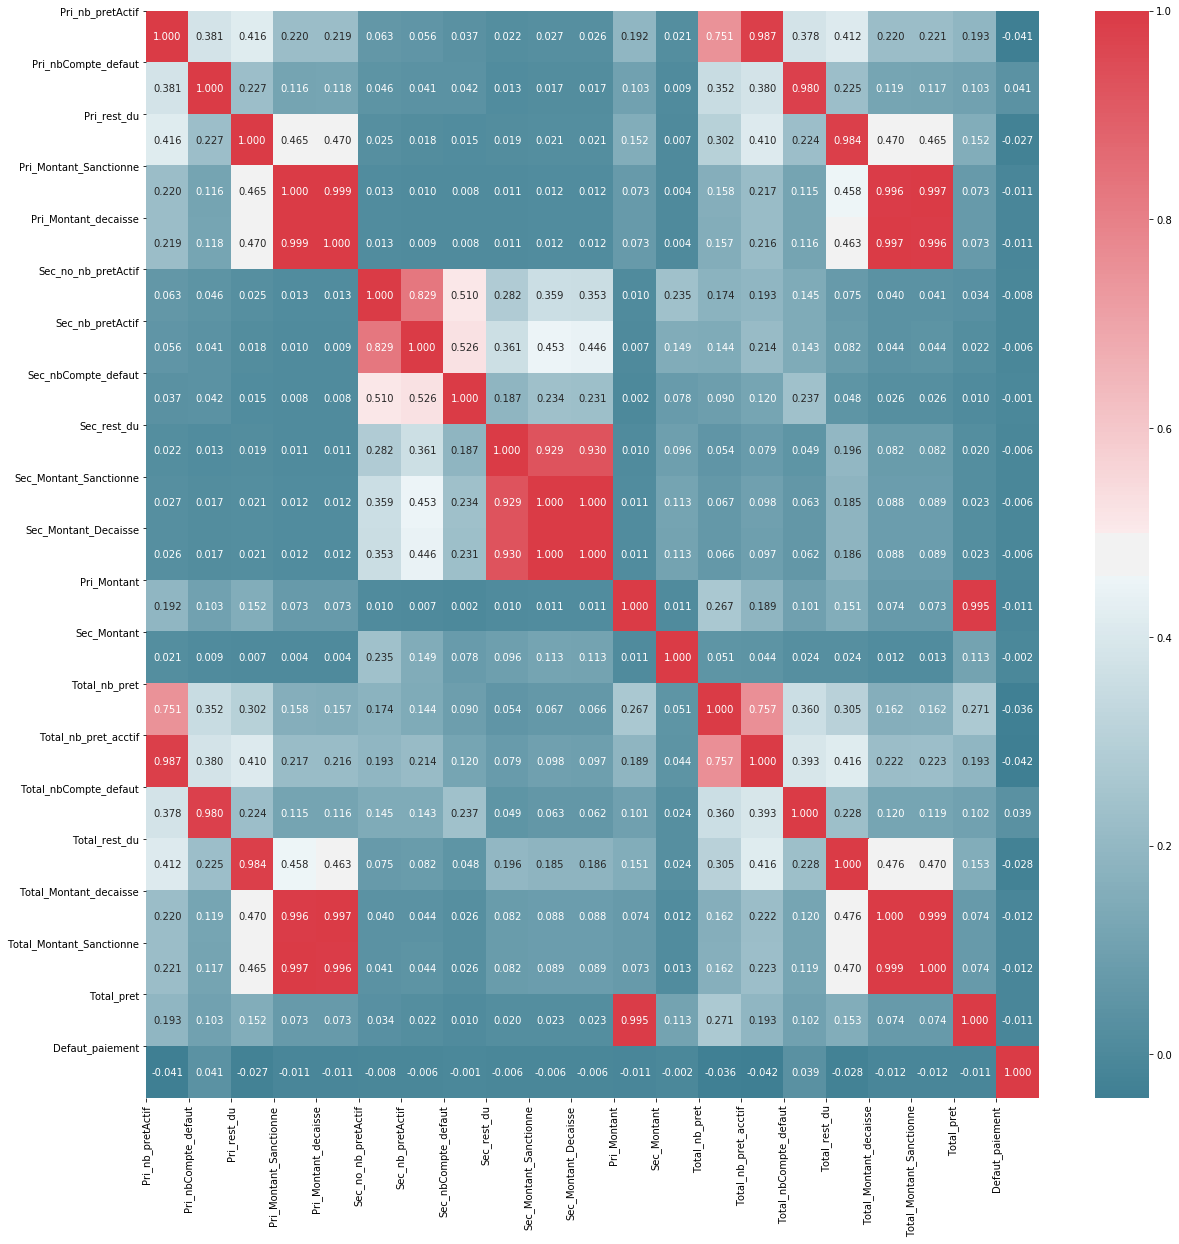

In [66]:
corr = autre_data.corr()
fig, ax = plt.subplots(figsize=(20,20))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".3f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

On remarque avec la matrice de correlation que les variables nouvellement crées ont une correlation un peu élévée avec la variable cible que les variables portant des informations sur le compte primaire avec à chaque fois une différence de 0.001. cette différence n'est pas très significative mais apporte une information complémentaire. Ainsi dans la suite du projet notamment pour la partie modélisation, on utilisera ces variables nouvellement créees en remplacement des autres variables.
Cela voudrait dire que l'on a réduit le nombre de variable de 38 à 31.

In [171]:
data.columns

Index(['Montant_pret', 'CoutActif', 'Rapport_Pret_Valeur', 'branch',
       'manufacturer', 'type_emploi', 'Etat_deboursement', 'Numero_Aadhar',
       'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag',
       'Score_bureau', 'Description_score_bureau', 'nbTotal_pretContracte',
       'Pri_nb_pretActif', 'Pri_nbCompte_defaut', 'Pri_rest_du',
       'Pri_Montant_Sanctionne', 'Pri_Montant_decaisse', 'Sec_no_nb_pretActif',
       'Sec_nb_pretActif', 'Sec_nbCompte_defaut', 'Sec_rest_du',
       'Sec_Montant_Sanctionne', 'Sec_Montant_Decaisse', 'Pri_Montant',
       'Sec_Montant', 'Nv_Pret_6_Der_Mois', 'Defaut_Pret_6_DerMois',
       'Duree_Moy_Pret', 'Temps_Ecoule_Depuis_Pret1', 'Nb_Demande_Pret_Client',
       'Defaut_paiement', 'Total_nb_pret', 'Total_nb_pret_acctif',
       'Total_nbCompte_defaut', 'Total_rest_du', 'Total_Montant_decaisse',
       'Total_Montant_Sanctionne', 'Total_pret'],
      dtype='object')

In [16]:
liste = ['Montant_pret', 'CoutActif', 'Rapport_Pret_Valeur', 'branch',
       'manufacturer', 'type_emploi', 'Etat_deboursement', 'Numero_Aadhar',
       'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag',
       'Score_bureau', 'Description_score_bureau',
         'Nv_Pret_6_Der_Mois', 'Defaut_Pret_6_DerMois',
       'Duree_Moy_Pret', 'Temps_Ecoule_Depuis_Pret1', 'Nb_Demande_Pret_Client',
        'Total_nb_pret', 'Total_nb_pret_acctif',
       'Total_nbCompte_defaut', 'Total_rest_du', 'Total_Montant_decaisse',
       'Total_Montant_Sanctionne', 'Total_pret','Defaut_paiement']
data_new = data[liste]

In [56]:
data_new.shape

(233153, 27)

### Matrice de correlation de toutes les variables de la base

On est conscient que notre base contient des variables quantitatives et qualitatives et que la matrice de correlation n'est pas adapté pour tester la correlation. Mais parceque les variables sont toutes numeriques à ce stade, on a décidé de voir l'eventuelle liaison qu'elles entretiennent avec la matrice de correlation. 

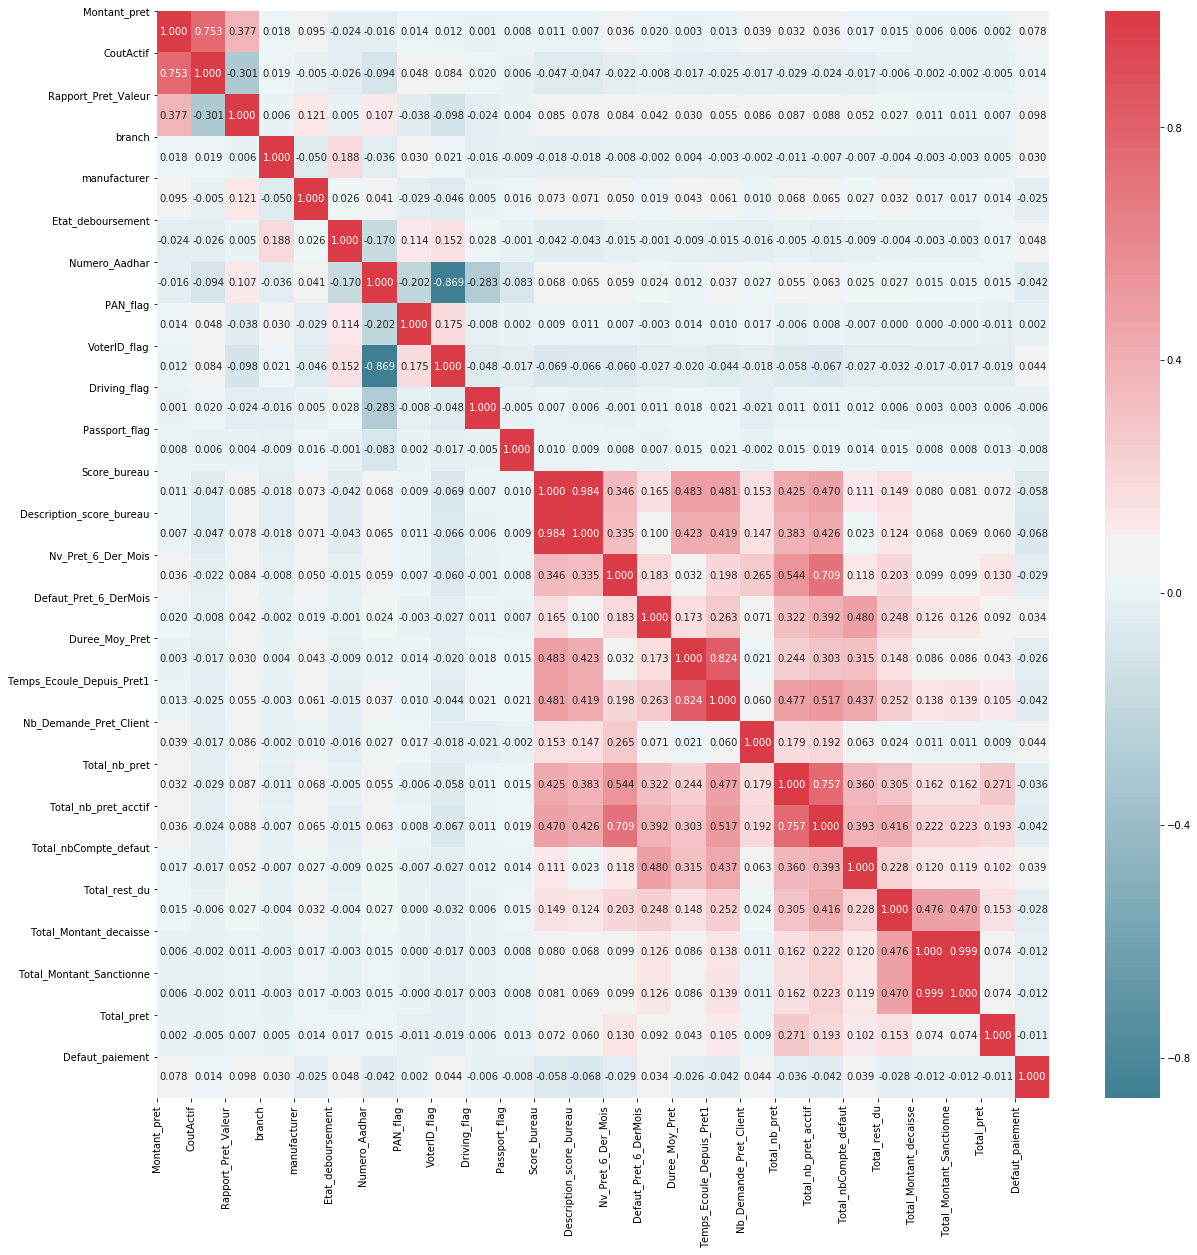

In [174]:
corr = data_new.corr()
fig, ax = plt.subplots(figsize=(20,20))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".3f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

On remarque :
Pour les variables quantitatives qu'il y a : une forte correlation linéaire entre :
* **Montant_prêt** et **coutactif** 
* **Total_montant_decaisse** et **Total_montant_Sanctionne**
* **Duree_Moy_pret** et **temps_ecoule_Depuis_pret1**
Une analyse en corresondance Principale (ACP) entre les variables quantitatives sera faite pour pousser l'exploration et pour pouvoir créer de nouvelles variables si possible 

Pour les variables quantitatives et qualitatives :
il y a un éventuel lien entre la variable quantitative **Score_bureau** et la variable qualitative **Description_score_bureau**. Pour cette dernière, on regarde de plus près le graphique des boxplots en croisant la variable quali avec la variable quanti  


#### Boites de moustache entre Description_score_bureau et Score_bureau

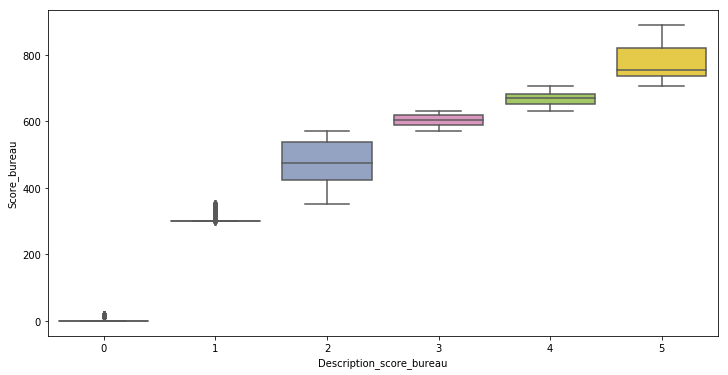

In [177]:
sns.boxplot( y = data_new['Score_bureau'], x = data_new["Description_score_bureau"] ,  palette ="Set2")

Le graphique vient confirmer la valeur forte observée dans la matrice de correlation. on remarque ainsi qu'il n'y a pas de chevauchement et que ces deux variables sont parfaitement liées.
Dans la construction du modèle faudrait supprimer une d'entre elles 


## Travail sous environnement R 

In [19]:
dataR = data_new.copy()
dataR['Defaut_paiement'] = dataR['Defaut_paiement'].astype(float)

In [20]:
%%R -i dataR
attach(dataR)

In [73]:
%%R 
typeof(dataR$Defaut_paiement) # le type de la variable cible sous R

[1] "double"


In [22]:
%%R # Imporattion des libraries de R à utiliser 
library(Hmisc)
library(lattice)
library(questionr)
library(ggplot2)
library(psych)
library(Information)
library(InformationValue)
library(forcats)
library(corrplot)
library(vcd)

### ACP  sur les variables quantitatives 

L’analyse en composantes principales (ACP) va nous permettre de mieux visualiser la variation présente dans le jeu de données en transformant les variables originales en un plus petit nombre de « composantes principales » ce qui nous permettra ainsi de mieux illustrer les données. 

In [23]:
%%R
library(FactoMineR)
library (factoextra)

R[write to console]: Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [81]:
%%R
colnames(dataR)

 [1] "Montant_pret"              "CoutActif"                
 [3] "Rapport_Pret_Valeur"       "branch"                   
 [5] "manufacturer"              "type_emploi"              
 [7] "Etat_deboursement"         "Numero_Aadhar"            
 [9] "PAN_flag"                  "VoterID_flag"             
[11] "Driving_flag"              "Passport_flag"            
[13] "Score_bureau"              "Description_score_bureau" 
[15] "Nv_Pret_6_Der_Mois"        "Defaut_Pret_6_DerMois"    
[17] "Duree_Moy_Pret"            "Temps_Ecoule_Depuis_Pret1"
[19] "Nb_Demande_Pret_Client"    "Total_nb_pret"            
[21] "Total_nb_pret_acctif"      "Total_nbCompte_defaut"    
[23] "Total_rest_du"             "Total_Montant_decaisse"   
[25] "Total_Montant_Sanctionne"  "Total_pret"               
[27] "Defaut_paiement"          


In [82]:
dataR.columns

Index(['Montant_pret', 'CoutActif', 'Rapport_Pret_Valeur', 'branch',
       'manufacturer', 'type_emploi', 'Etat_deboursement', 'Numero_Aadhar',
       'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag',
       'Score_bureau', 'Description_score_bureau', 'Nv_Pret_6_Der_Mois',
       'Defaut_Pret_6_DerMois', 'Duree_Moy_Pret', 'Temps_Ecoule_Depuis_Pret1',
       'Nb_Demande_Pret_Client', 'Total_nb_pret', 'Total_nb_pret_acctif',
       'Total_nbCompte_defaut', 'Total_rest_du', 'Total_Montant_decaisse',
       'Total_Montant_Sanctionne', 'Total_pret', 'Defaut_paiement'],
      dtype='object')

In [83]:
%%R
liste = c('Montant_pret', 'CoutActif', 'Rapport_Pret_Valeur',
       'Nv_Pret_6_Der_Mois',
       'Defaut_Pret_6_DerMois', 'Duree_Moy_Pret', 'Temps_Ecoule_Depuis_Pret1',
       'Nb_Demande_Pret_Client', 'Score_bureau',"Total_nb_pret",            
 "Total_nb_pret_acctif","Total_nbCompte_defaut", "Total_rest_du", "Total_Montant_decaisse",
          "Total_Montant_Sanctionne","Total_pret")
data_quanti = dataR[liste]

In [84]:
%%R 
summary(data_quanti)

  Montant_pret      CoutActif       Rapport_Pret_Valeur Nv_Pret_6_Der_Mois
 Min.   : 13320   Min.   :  37000   Min.   :10.03       Min.   : 0.0000   
 1st Qu.: 47145   1st Qu.:  65717   1st Qu.:68.88       1st Qu.: 0.0000   
 Median : 53803   Median :  70946   Median :76.80       Median : 0.0000   
 Mean   : 54357   Mean   :  75865   Mean   :74.75       Mean   : 0.3818   
 3rd Qu.: 60413   3rd Qu.:  79202   3rd Qu.:83.67       3rd Qu.: 0.0000   
 Max.   :990572   Max.   :1628992   Max.   :95.00       Max.   :35.0000   
 Defaut_Pret_6_DerMois Duree_Moy_Pret    Temps_Ecoule_Depuis_Pret1
 Min.   : 0.00000      Min.   : 0.0000   Min.   : 0.000           
 1st Qu.: 0.00000      1st Qu.: 0.0000   1st Qu.: 0.000           
 Median : 0.00000      Median : 0.0000   Median : 0.000           
 Mean   : 0.09748      Mean   : 0.7642   Mean   : 1.379           
 3rd Qu.: 0.00000      3rd Qu.: 1.0000   3rd Qu.: 2.000           
 Max.   :20.00000      Max.   :31.0000   Max.   :39.000           
 Nb_De

In [87]:
%%R
res_pca <- PCA(data_quanti, scale.unit = TRUE,ncp=5, graph = TRUE)

print (res_pca)

eig_val <- get_eigenvalue(res_pca)
eig_val

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 233153 individuals, described by 16 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard err

PermissionError: [WinError 32] Le processus ne peut pas accéder au fichier car ce fichier est utilisé par un autre processus: 'C:\\Users\\berni\\AppData\\Local\\Temp\\tmpf7ygg6uf\\Rplots001.png'

S’agissant d’une ACP normée, selon un critère absolu :  nous devrions garder 6 composantes principales (valeur propre supérieur à 1) expliquant 74,50% de l’inertie totale (C’est le critère de Kaiser)
Selon un critère relatif, sur la base du screeplot, on observe un léger coude également à partir du 6ème axe, puis une décroissance régulière.  

Au final nous avons synthétisé nos 16 variables explicatives, par 6 variables synthétiques pour comprendre la variabilité des individus. 


In [ ]:
%%R
fviz_eig(res_pca, geom = c("line"),linecolor = "blue",addlabels = TRUE, ylim = c(0, 50))

In [128]:
%%R
var <- get_pca_var(res_pca)
var

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               


In [129]:
%%R
#### Coordonnées 
head(var$coord)

                            Dim.1       Dim.2       Dim.3       Dim.4
Montant_pret           0.04772208 -0.01072318  0.95782263 -0.03589587
CoutActif             -0.04277769  0.05518131  0.89648779 -0.18372597
Rapport_Pret_Valeur    0.13107677 -0.09649801  0.12939363  0.20903347
Nv_Pret_6_Der_Mois     0.57474473 -0.16221485  0.06825449  0.59554396
Defaut_Pret_6_DerMois  0.50468903 -0.04402087  0.01305329 -0.04020098
Duree_Moy_Pret         0.55442394 -0.28175966 -0.07659271 -0.65215436
                            Dim.5
Montant_pret           0.24057737
CoutActif             -0.33639573
Rapport_Pret_Valeur    0.83676947
Nv_Pret_6_Der_Mois    -0.06987907
Defaut_Pret_6_DerMois -0.25611983
Duree_Moy_Pret         0.18147945


On sait que les variables contribuant le plus à la formation de ces axes sont celles dont les coordonnées sur l’axe analysé sont proches de 1 en valeur absolue.

In [130]:
%%R
#### Cos2: qualité de répresentation
head(var$cos2)


                            Dim.1        Dim.2        Dim.3       Dim.4
Montant_pret          0.002277397 0.0001149865 0.9174241951 0.001288513
CoutActif             0.001829931 0.0030449772 0.8036903580 0.033755233
Rapport_Pret_Valeur   0.017181120 0.0093118657 0.0167427126 0.043694990
Nv_Pret_6_Der_Mois    0.330331503 0.0263136587 0.0046586751 0.354672613
Defaut_Pret_6_DerMois 0.254711020 0.0019378366 0.0001703883 0.001616119
Duree_Moy_Pret        0.307385909 0.0793885037 0.0058664433 0.425305309
                            Dim.5
Montant_pret          0.057877472
CoutActif             0.113162087
Rapport_Pret_Valeur   0.700183152
Nv_Pret_6_Der_Mois    0.004883085
Defaut_Pret_6_DerMois 0.065597368
Duree_Moy_Pret        0.032934790


Pour repérer les contributions significatives, on utilise le tableau des contributions : on compare les valeurs de la colonne dim de la partie contribution, à la construction moyenne 1/16 = 6,25%, le signe des coordonnées donnant le sens de la contribution. 

Sur les graphiques ci dessous, les variables au dessus de la ligne rouge sont donc celles qui contribuent le plus. 

In [131]:
%%R
#### Contributions aux composantes principales
head(var$contrib)

                           Dim.1       Dim.2        Dim.3       Dim.4     Dim.5
Montant_pret          0.05388076 0.005642224 52.096222436  0.08504396  4.741792
CoutActif             0.04329419 0.149412675 45.637810602  2.22789950  9.271157
Rapport_Pret_Valeur   0.40648681 0.456919924  0.950740220  2.88393933 57.364687
Nv_Pret_6_Der_Mois    7.81528797 1.291173576  0.264544335 23.40896074  0.400062
Defaut_Pret_6_DerMois 6.02618871 0.095086867  0.009675551  0.10666646  5.374269
Duree_Moy_Pret        7.27241991 3.895480261  0.333127835 28.07083184  2.698285


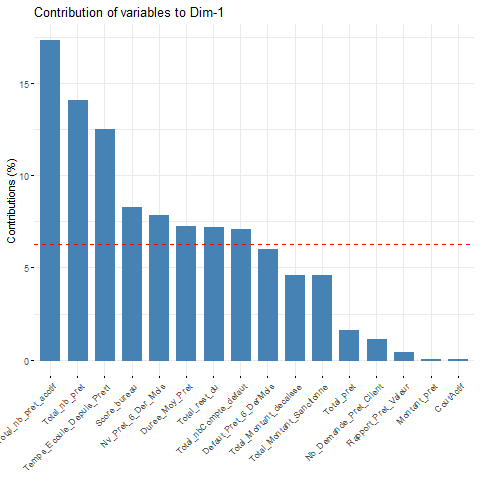

In [132]:
%%R
fviz_contrib(res_pca, choice = "var", axes = 1)

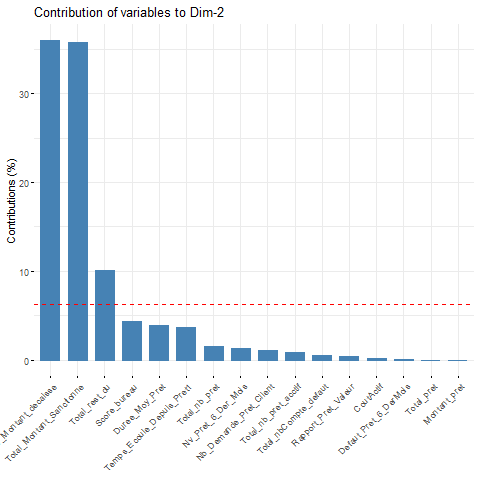

In [133]:
%%R
fviz_contrib(res_pca, choice = "var", axes = 2)


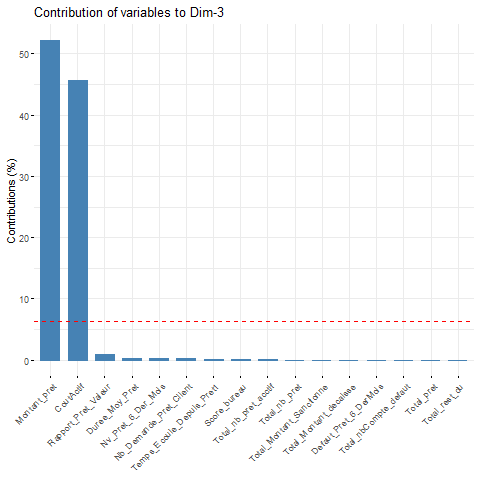

In [134]:
%%R
fviz_contrib(res_pca, choice = "var", axes = 3)

Nous représentatons les variables sur les 3 premières composantes, les 2 axes du graphique représentent les coefficients de corrélation qui vont de -1 à 1.

Les flèches indiquent à la fois la corrélation de chacune des variables à l’axe donné et la corrélation des variables entre elles. 

Les variables qui ne sont pas corrélées (ou faiblement corrélées) sont indiquées par des flèches orthogonales (qui forment un angle droit) l’une par rapport à l’autre. 

Toutes les variables ne sont pas très bien représentées sur ces axe (voir la jauge du COS2 sur la projection : la qualité de la représentation est égale à la coordonnée au carré ; certaines valeurs sont significativement éloignées de 1). 

Une variable est bien représentée lorsqu’elle est proche du cercle des corrélations et à proximité de l’axe.

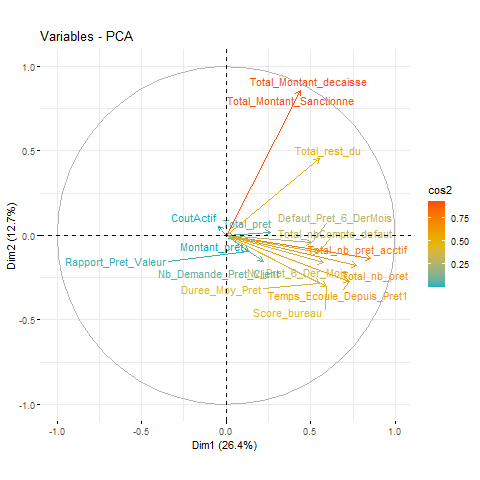

In [135]:
%%R
## Cercle de correlation
fviz_pca_var(res_pca, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Évite le chevauchement de texte
)



Comme nous l’avions déjà anticipé dans la partie corrélation, toutes les variables sont de même signe sur le premier axe factoriel. Que signifie ceci ? Qu'elles sont toutes corrélées positivement entre elles. Un effet taille pollue notre ACP toutes les variables évoluant dans le même sens ne permet pas une interpretation plus approfondie. 


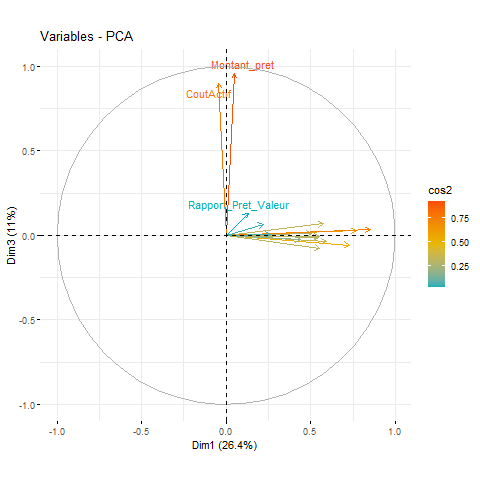

In [136]:
%%R
## Cercle de correlation
fviz_pca_var(res_pca,axes = c(1,3), col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Évite le chevauchement de texte
)


Nous l'avons vu lors de la partie correlation, les variables montant_pret et coutActif sont significativement et positivement correlées.  En effet, si le montant du prêt augmente alors de la même manière le coût actif aussi et inversement.  
Les autres variables n'étant pas bien representées ne pourront faire l'objet d'une conclusion. 

R[write to console]: corrplot 0.89 loaded



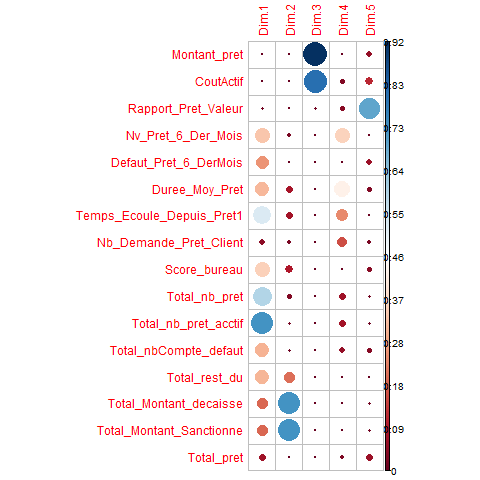

In [137]:
%%R
library(corrplot)
corrplot(var$cos2,is.corr=FALSE)

In [138]:
%%R
liste = c('Montant_pret', 'CoutActif', 'Rapport_Pret_Valeur',
       'Nv_Pret_6_Der_Mois',
       'Defaut_Pret_6_DerMois', 'Duree_Moy_Pret', 'Temps_Ecoule_Depuis_Pret1',
       'Nb_Demande_Pret_Client', 'Score_bureau',"Total_nb_pret",            
 "Total_nb_pret_acctif","Total_nbCompte_defaut", "Total_rest_du", "Total_Montant_decaisse",
          "Total_Montant_Sanctionne","Total_pret","Defaut_paiement")
data_quanti_cible = dataR[liste]

In [139]:
%%R
data_acp_new = cbind(data_quanti_cible,res_pca$ind$coord)

                                Dim.1         Dim.2        Dim.3       Dim.4
Montant_pret               0.04772208 -0.0107231765  0.957822632 -0.03589587
CoutActif                 -0.04277769  0.0551813123  0.896487790 -0.18372597
Rapport_Pret_Valeur        0.13107677 -0.0964980089  0.129393634  0.20903347
Nv_Pret_6_Der_Mois         0.57474473 -0.1622148537  0.068254488  0.59554396
Defaut_Pret_6_DerMois      0.50468903 -0.0440208651  0.013053285 -0.04020098
Duree_Moy_Pret             0.55442394 -0.2817596560 -0.076592711 -0.65215436
Temps_Ecoule_Depuis_Pret1  0.72752507 -0.2735799475 -0.057619667 -0.48972526
Nb_Demande_Pret_Client     0.21988311 -0.1531140998  0.066930594  0.40224580
Score_bureau               0.59194582 -0.2999759470 -0.035819821 -0.07549900
Total_nb_pret              0.77134057 -0.1793877154  0.027939270  0.27042452
Total_nb_pret_acctif       0.85504662 -0.1366499148  0.033488634  0.27926041
Total_nbCompte_defaut      0.54620793 -0.1021031798 -0.012625314 -0.24043747

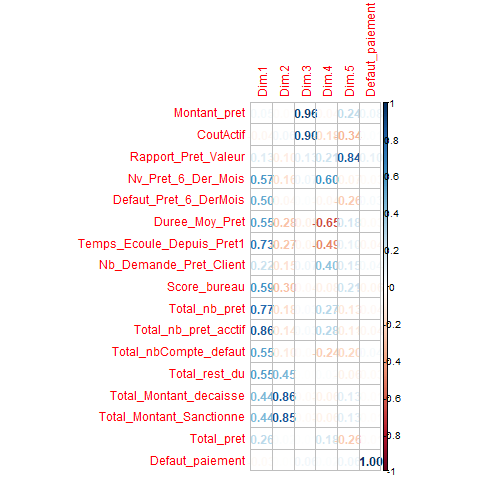

In [140]:
%%R
mcor <-cor(data_quanti_cible,data_acp_new[c('Dim.1','Dim.2','Dim.3','Dim.4','Dim.5','Defaut_paiement')])
corrplot(mcor, method = "number")
mcor

### Conclusion de l'exploration  et des tests d'independance et de correlation

L'ACP ne nous a pas tellement avancé car aucun axe crée n'est correlé avec la variable cible.
La création ci dessus de nouvelles variables qui résument l'information sur les comptes primaires et secondaires nous a permis neanmoins de réduire le lien entre les variables et surtout de réduire la dimension de notre jeu de donnée sans permettre de l'information.
Nous contruisons notre modèle dans un premier temps avec les 27 variables ci dessous


In [180]:
data_new.columns

Index(['Montant_pret', 'CoutActif', 'Rapport_Pret_Valeur', 'branch',
       'manufacturer', 'type_emploi', 'Etat_deboursement', 'Numero_Aadhar',
       'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag',
       'Score_bureau', 'Description_score_bureau', 'Nv_Pret_6_Der_Mois',
       'Defaut_Pret_6_DerMois', 'Duree_Moy_Pret', 'Temps_Ecoule_Depuis_Pret1',
       'Nb_Demande_Pret_Client', 'Total_nb_pret', 'Total_nb_pret_acctif',
       'Total_nbCompte_defaut', 'Total_rest_du', 'Total_Montant_decaisse',
       'Total_Montant_Sanctionne', 'Total_pret', 'Defaut_paiement'],
      dtype='object')

## Modelisation 

In [17]:
def encode(series):
    if series == 'Self employed':
        return 1
    elif series == 'Salaried':
        return 2
    else:
        return 3
data_new['type_emploi'] = data_new['type_emploi'].apply(encode)

### Random Forest 

In [18]:
X = data_new.drop('Defaut_paiement', axis=1)# X->Feature Variables
y = data_new['Defaut_paiement'] # y -> Target

from imblearn.over_sampling import SMOTE

X, y = SMOTE().fit_resample(X, y.values.ravel()) 

# checking the shape of X and y
print("Shape of x:", X.shape)
print("Shape of y:", y.shape)

Shape of x: (365084, 26)
Shape of y: (365084,)


In [90]:
# Splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [91]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler,MaxAbsScaler

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

              precision    recall  f1-score   support

           0       0.79      0.90      0.84     36566
           1       0.88      0.76      0.82     36451

    accuracy                           0.83     73017
   macro avg       0.84      0.83      0.83     73017
weighted avg       0.84      0.83      0.83     73017

[[32953  3613]
 [ 8797 27654]]
accuracy is 0.8300395798238767
Sur ce jeu de données, le taux de succès en classification moyen de : 0.8282448880585097


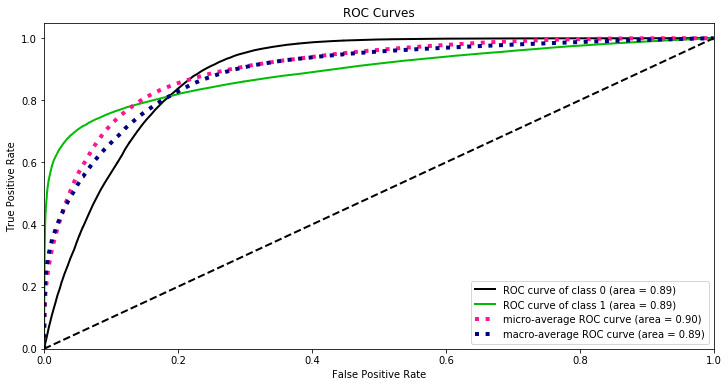

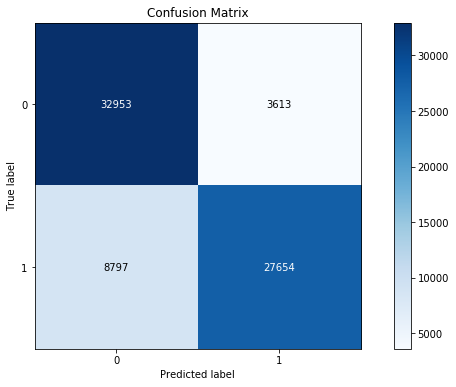

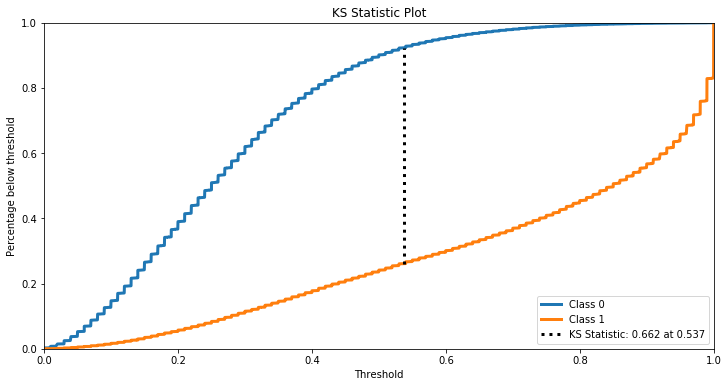

In [92]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import scikitplot as skplt
from sklearn.ensemble import RandomForestClassifier

Model_ran=RandomForestClassifier()

Model_ran = Model_ran.fit(X_train, y_train)
y_probas = Model_ran.predict_proba(X_test)
y_pred = Model_ran.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))
score = cross_val_score(Model_ran, X_train, y_train,cv=10)
print ("Sur ce jeu de données, le taux de succès en classification moyen de :",score.mean())

skplt.metrics.plot_roc(y_test, y_probas)
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
skplt.metrics.plot_ks_statistic(y_test, y_probas)
plt.show()

La matrice de confusion est également affichée. En diagonale (32953/27654) correspond aux individus correctement
classés, la prédiction de l’algorithme est ainsi conforme aux données observées.
Les autres valeurs 3613 et 8797 correspondent aux individus mal classés.
On comprend ainsi que le taux d'accuracy est obtenu de la manière suivante: vrai positif et vrai négatif sur le total de notre population. Soit (32953+27654) / 73017.
Ca semble un bon score, néanmoins cette métrique n'indique pas les forces et faiblesses de notre modèle.

Le recall est une mesure du nombre de positifs que notre modèle est capable de rappeler à partir des données. Sur tous les enregistrements positifs combien d'enregistrements sur prédits correctement.
vrai positif / vrai positif + faux négatif soit 95 %
Le recall est une métrique de sensibilité et pour notre cas nous cherchons justement à nous rapprocher de 1.

La précision est le rapport entre les prévisions positives correctes et les prévisions positives totales.
Sur tous les positifs prédits, combien sont réellement positifs.
Cette métrique est intéressante lorsque l'on souhaite minimiser les faux positifs.

Le F1 Score combine subtilement la précision et le rappel à privilégier lors de "imbalanced class" par exemple si nous avions une majorité de vrais négatifs qui fausserait complètement notre perception de la performance de l'algorithme. Celui ci est la moyenne arithmétique entre la précision et le rappel. Dans notre cas, nous enregistrons un résultat de 83% en moyenne, ce qui est très proche de 1. 

La courbe ROC est le graphique représentant les performances d'un modèle de classification pour les seuils de classification.
La courbe optimale est celle la plus proche du coin supérieur gauche. 
Notre courbe nous montre que notre prédiction est bien meilleure qu'une prédiction aléatoire, en effet, nous pouvons observer que notre courbe s'éloigne de la diagonale bissectrice et se rapproche de l'angle supérieur gauche ou sensibilité et spécificité se rapprochent de 100%.

Un modèle parfait suggère un éloignement complet de la ROC de la bissectrice. Plus la courbe s’éloigne,plus l’aire sur la courbe est importante et plus le modèle est performant. Ici, on a une AUC=0.83, ce qui donne un Gini =2AUC-1= 2*0.83-1= 0.66 
On peut donc souligner que les résulats sont satisfaisants. 


Le graphique de Test de Kolmogorov-Smirnov vient confirmer que le modèle est satisfaisant dans la mesure ou nous observons un écart signficatif entre nos 2 modalités, permettant ainsi de classifier de manière optimale. 

### Regression logistique 

C:\Users\berni\Nouveau dossier (4)\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.68      0.73      0.70     36566
           1       0.71      0.65      0.68     36451

    accuracy                           0.69     73017
   macro avg       0.69      0.69      0.69     73017
weighted avg       0.69      0.69      0.69     73017

[[26699  9867]
 [12612 23839]]
accuracy is 0.6921401865319036


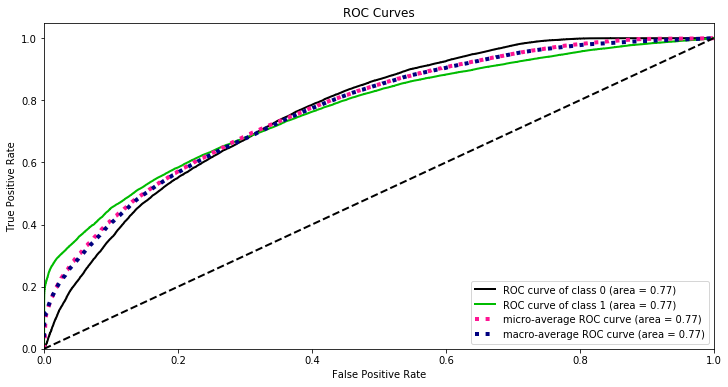

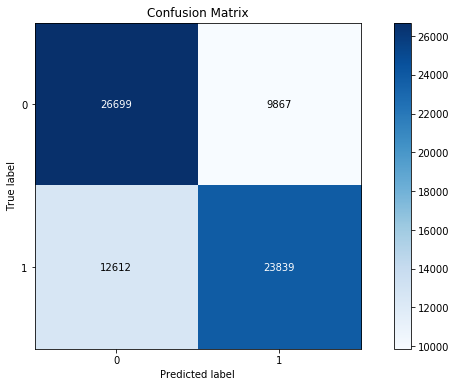

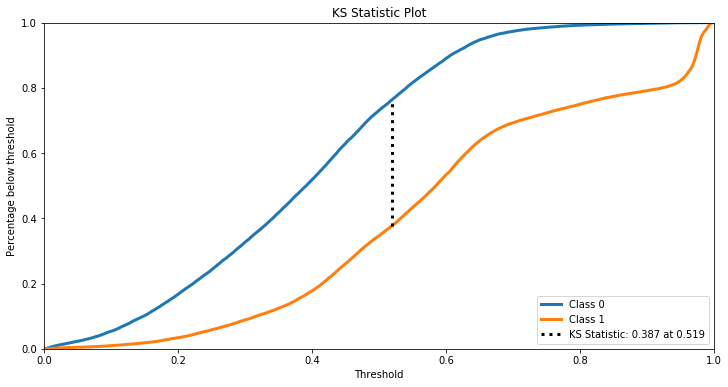

In [94]:
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt

Model_log = LogisticRegression()

Model_log = Model_log.fit(X_train, y_train)
y_probas = Model_log.predict_proba(X_test)
y_pred = Model_log.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))


skplt.metrics.plot_roc(y_test, y_probas)
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
skplt.metrics.plot_ks_statistic(y_test, y_probas)
plt.show()


Les résultats observés sur la régression logistiqu nous montre que cette dernière est moins performante que le random forest.

En effet, nous enregistrons les résultats suivant pour la régression logistique : 
    
on remarque que la sensibilité est de 0.65 pour la classe 1 (défaut paiement), cela signifie que parmi les individus
positifs on a 65% de chance d’identifier un client susceptible d'être en défaut de paiement.
Et que notre modèle est précis à 69%. 

Aussi en observant le graphique de Test de Kolmogorov-Smirnov vient confirmer que l'écart est moins important en comparaison de Random Forest. 

Toujours dans le but de parfaire notre modèle, et surtout pour mieux apprehender la méthode de discretisation nous discretisons toutes nos variables quantitatives.

cela permettrait peut-être de mieux deceler les liens entre les variables explicatives et ainsi pouvoir bien selectionner les variables entrant dans la construction du modèle puisque nos variables seront toutes qualitatives.   

## Discrétisation des variables quantitatives

Pour la discretisation, on fait le choix de diviser noss variables en 10 ou 20 classes selon le besoin et on regroupe les modalités qui découlent de cette division  en tenant compte du WOE.
Ainsi sont regroupées dans la même classe les WOE qui oont le même comportement


In [109]:
%%R 
colnames(data_quanti)

 [1] "Montant_pret"              "CoutActif"                
 [3] "Rapport_Pret_Valeur"       "Nv_Pret_6_Der_Mois"       
 [5] "Defaut_Pret_6_DerMois"     "Duree_Moy_Pret"           
 [7] "Temps_Ecoule_Depuis_Pret1" "Nb_Demande_Pret_Client"   
 [9] "Score_bureau"              "Total_nb_pret"            
[11] "Total_nb_pret_acctif"      "Total_nbCompte_defaut"    
[13] "Total_rest_du"             "Total_Montant_decaisse"   
[15] "Total_Montant_Sanctionne"  "Total_pret"               


In [110]:
%%R
q = unique(quantile(dataR$Montant_pret, seq(0, 1, by =0.1)))
q[1] = q[1]- 1
qcr = cut(dataR$Montant_pret, q)
tab = table(qcr, dataR$Defaut_paiement)

dataR$Montant_pret = qcr
options(scipen = 999, digits = 2)
WOETable(X=qcr, dataR$Defaut_paiement)

                   CAT GOODS  BADS TOTAL PCT_G PCT_B    WOE       IV
1  (1.33e+04,3.98e+04]  3380 20025 23405 0.067 0.110 -0.496 0.021299
2  (3.98e+04,4.53e+04]  3797 19429 23226 0.075 0.106 -0.350 0.010986
3  (4.53e+04,4.86e+04]  4302 19023 23325 0.085 0.104 -0.204 0.003914
4  (4.86e+04,5.13e+04]  4792 19063 23855 0.095 0.104 -0.098 0.000955
5  (5.13e+04,5.38e+04]  5162 18239 23401 0.102 0.100  0.021 0.000043
6  (5.38e+04,5.62e+04]  5450 17230 22680 0.108 0.094  0.132 0.001752
7  (5.62e+04,5.88e+04]  5864 17628 23492 0.116 0.097  0.182 0.003515
8  (5.88e+04,6.24e+04]  5880 17562 23442 0.116 0.096  0.189 0.003767
9  (6.24e+04,6.89e+04]  5947 17087 23034 0.118 0.094  0.227 0.005434
10 (6.89e+04,9.91e+05]  6037 17256 23293 0.119 0.095  0.233 0.005756


In [111]:
%%R
dataR$Montant_pret <- fct_recode(dataR$Montant_pret,
           "1"="(1.33e+04,3.98e+04]",
           "1"="(3.98e+04,4.53e+04]",
           "1"="(4.53e+04,4.86e+04]", 
           "1"="(4.86e+04,5.13e+04]",
           "2"="(5.13e+04,5.38e+04]", 
           "2"="(5.38e+04,5.62e+04]", 
           "2"="(5.62e+04,5.88e+04]", 
           "2"="(5.88e+04,6.24e+04]",
           "2"="(6.24e+04,6.89e+04]",
           "2"="(6.89e+04,9.91e+05]"
           )

In [114]:
%%R
q = unique(quantile(dataR$Rapport_Pret_Valeur, seq(0, 1, by =0.1)))
q[1] = q[1]- 1
qcr = cut(dataR$Rapport_Pret_Valeur, q)
tab = table(qcr, dataR$Defaut_paiement)

dataR$Rapport_Pret_Valeur <-qcr
options(scipen = 999, digits = 2)
WOETable(X=qcr, dataR$Defaut_paiement)

           CAT GOODS  BADS TOTAL PCT_G PCT_B     WOE         IV
1  (9.03,58.9]  3202 20118 23320 0.063 0.110 -0.5550 0.02605489
2  (58.9,66.3]  3801 19534 23335 0.075 0.107 -0.3541 0.01129828
3  (66.3,70.9]  4415 18928 23343 0.087 0.104 -0.1728 0.00284419
4  (70.9,74.2]  4814 18555 23369 0.095 0.102 -0.0664 0.00043360
5  (74.2,76.8]  5052 18183 23235 0.100 0.100  0.0021 0.00000044
6  (76.8,79.5]  5236 18189 23425 0.103 0.100  0.0376 0.00014318
7    (79.5,82]  5637 17577 23214 0.111 0.096  0.1456 0.00219651
8    (82,84.7]  6078 17255 23333 0.120 0.095  0.2394 0.00612019
9    (84.7,88]  6199 17119 23318 0.122 0.094  0.2670 0.00766376
10     (88,95]  6177 17084 23261 0.122 0.094  0.2655 0.00755595


In [115]:
%%R
dataR$Rapport_Pret_Valeur <- fct_recode(dataR$Rapport_Pret_Valeur,
           "1"="(9.03,58.9]",
           "1"="(58.9,66.3]",
           "1"="(66.3,70.9]", 
           "1"="(70.9,74.2]",
           "2"="(74.2,76.8]", 
           "2"="(76.8,79.5]", 
           "2"="(79.5,82]", 
           "2"="(82,84.7]",
           "2"="(84.7,88]",
           "2"="(88,95]"
           )

In [116]:
%%R
q = unique(quantile(dataR$Defaut_Pret_6_DerMois, seq(0, 1, by =0.05)))
q[1] = q[1]- 1
qcr = cut(dataR$Defaut_Pret_6_DerMois, q)
tab = table(qcr, dataR$Defaut_paiement)

dataR$Defaut_Pret_6_DerMois <- qcr
options(scipen = 999, digits = 2)
WOETable(X=qcr, dataR$Defaut_paiement)

     CAT GOODS   BADS  TOTAL PCT_G PCT_B     WOE       IV
1 (-1,1] 49701 180198 229899 0.982 0.987 -0.0052 0.000027
2 (1,20]   910   2344   3254 0.018 0.013  0.3366 0.001730


In [117]:
%%R
dataR$Defaut_Pret_6_DerMois <- fct_recode(dataR$Defaut_Pret_6_DerMois,
           "1"="(-1,1]",
           "2"="(1,20]"
           )

In [118]:
%%R
q = unique(quantile(dataR$Temps_Ecoule_Depuis_Pret1, seq(0, 1, by =0.1)))
q[1] = q[1]- 1
qcr = cut(dataR$Temps_Ecoule_Depuis_Pret1, q)
tab = table(qcr, dataR$Defaut_paiement)

dataR$Temps_Ecoule_Depuis_Pret1 <- qcr
options(scipen = 999, digits = 2)
WOETable(X=qcr, dataR$Defaut_paiement)

     CAT GOODS   BADS  TOTAL PCT_G PCT_B    WOE      IV
1 (-1,1] 36505 125930 162435 0.721 0.690  0.045 0.00140
2  (1,2]  5850  20661  26511 0.116 0.113  0.021 0.00005
3  (2,4]  4830  19343  24173 0.095 0.106 -0.105 0.00110
4 (4,39]  3426  16608  20034 0.068 0.091 -0.296 0.00689


In [119]:
%%R
dataR$Temps_Ecoule_Depuis_Pret1 <- fct_recode(dataR$Temps_Ecoule_Depuis_Pret1,
           "1"="(-1,1]",
           "1"="(1,2]",
           "2"="(2,4]", 
           "2"="(4,39]"
           )

In [121]:
%%R
q = unique(quantile(dataR$Score_bureau, seq(0, 1, by =0.1)))
q[1] = q[1]- 1
qcr = cut(dataR$Score_bureau, q)
tab = table(qcr, dataR$Defaut_paiement)

dataR$Score_bureau <- qcr
options(scipen = 999, digits = 2)
WOETable(X=qcr, dataR$Defaut_paiement)

        CAT GOODS   BADS  TOTAL PCT_G PCT_B   WOE     IV
1  (-1,359] 32860 107035 139895 0.649 0.586  0.10 0.0064
2 (359,627]  6206  17286  23492 0.123 0.095  0.26 0.0072
3 (627,709]  4202  19104  23306 0.083 0.105 -0.23 0.0050
4 (709,761]  3800  19383  23183 0.075 0.106 -0.35 0.0108
5 (761,890]  3543  19734  23277 0.070 0.108 -0.43 0.0166


In [122]:
%%R
dataR$Score_bureau <- fct_recode(dataR$Score_bureau,
           "1"="(-1,359]",
           "1"="(359,627]",
           "2"="(627,709]", 
           "2"="(709,761]",
           "2"="(761,890]"
           )

In [123]:
%%R
## Variable Nv_Pret_6_Der_Mois
q = unique(quantile(dataR$Nv_Pret_6_Der_Mois, seq(0, 1, by =0.05)))
q[1] = q[1]- 1
qcr = cut(dataR$Nv_Pret_6_Der_Mois, q)
tab = table(qcr, dataR$Defaut_paiement)

dataR$Nv_Pret_6_Der_Mois <-qcr
options(scipen = 999, digits = 2)
WOETable(X=qcr, dataR$Defaut_paiement)

     CAT GOODS   BADS  TOTAL PCT_G PCT_B    WOE      IV
1 (-1,1] 47046 166546 213592 0.930 0.912  0.019 0.00032
2  (1,2]  2084   8931  11015 0.041 0.049 -0.172 0.00134
3 (2,35]  1481   7065   8546 0.029 0.039 -0.280 0.00264


In [124]:
%%R
dataR$Nv_Pret_6_Der_Mois <- fct_recode(dataR$Nv_Pret_6_Der_Mois,
           "1"="(-1,1]",
           "2"="(1,2]",
           "2"="(2,35]"
           )

In [125]:
%%R
q = unique(quantile(dataR$CoutActif, seq(0, 1, by =0.1)))
q[1] = q[1]- 1
qcr = cut(dataR$CoutActif, q)
tab = table(qcr, dataR$Defaut_paiement)

dataR$CoutActif <-qcr
options(scipen = 999, digits = 2)
WOETable(X=qcr, dataR$Defaut_paiement)

                   CAT GOODS  BADS TOTAL PCT_G PCT_B     WOE         IV
1   (3.7e+04,6.13e+04]  5082 18242 23324 0.100 0.100  0.0048 0.00000230
2  (6.13e+04,6.45e+04]  4833 18489 23322 0.095 0.101 -0.0589 0.00034120
3  (6.45e+04,6.68e+04]  4769 18562 23331 0.094 0.102 -0.0762 0.00056804
4  (6.68e+04,6.88e+04]  4926 18362 23288 0.097 0.101 -0.0329 0.00010740
5  (6.88e+04,7.09e+04]  4904 18408 23312 0.097 0.101 -0.0399 0.00015756
6  (7.09e+04,7.35e+04]  5067 18250 23317 0.100 0.100  0.0014 0.00000019
7  (7.35e+04,7.68e+04]  5102 18213 23315 0.101 0.100  0.0103 0.00001066
8  (7.68e+04,8.31e+04]  5153 18160 23313 0.102 0.099  0.0232 0.00005403
9  (8.31e+04,9.91e+04]  5319 17997 23316 0.105 0.099  0.0639 0.00041560
10 (9.91e+04,1.63e+06]  5456 17859 23315 0.108 0.098  0.0970 0.00096706


In [126]:
%%R
dataR$CoutActif <- fct_recode(dataR$CoutActif,
           "1"="(3.7e+04,6.13e+04]",
           "2"="(6.13e+04,6.45e+04]",
           "2"="(6.45e+04,6.68e+04]", 
           "2"="(6.68e+04,6.88e+04]",
           "2"="(6.88e+04,7.09e+04]", 
           "1"="(7.09e+04,7.35e+04]", 
           "3"="(7.35e+04,7.68e+04]", 
           "3"="(7.68e+04,8.31e+04]",
           "3"="(8.31e+04,9.91e+04]",
           "3"="(9.91e+04,1.63e+06]"
           )

In [127]:
%%R
q = unique(quantile(dataR$Duree_Moy_Pret, seq(0, 1, by =0.05)))
q[1] = q[1]- 1
qcr = cut(dataR$Duree_Moy_Pret, q)
tab = table(qcr, dataR$Defaut_paiement)

dataR$Duree_Moy_Pret <- qcr
options(scipen = 999, digits = 2)
WOETable(X=qcr, dataR$Defaut_paiement)

     CAT GOODS   BADS  TOTAL PCT_G PCT_B    WOE      IV
1 (-1,1] 42319 149327 191646 0.836 0.818  0.022 0.00040
2  (1,2]  4442  17976  22418 0.088 0.098 -0.115 0.00123
3  (2,3]  2045   7760   9805 0.040 0.043 -0.051 0.00011
4 (3,31]  1805   7479   9284 0.036 0.041 -0.139 0.00074


In [128]:
%%R
dataR$Duree_Moy_Pret <- fct_recode(dataR$Duree_Moy_Pret,
           "1"="(-1,1]",
           "2"="(1,2]",
           "2"="(2,3]", 
           "2"="(3,31]"
           )

In [129]:
%%R
q = unique(quantile(dataR$Nb_Demande_Pret_Client, seq(0, 1, by =0.05)))
q[1] = q[1]- 1
qcr = cut(dataR$Nb_Demande_Pret_Client, q)
tab = table(qcr, dataR$Defaut_paiement)

dataR$Nb_Demande_Pret_Client <-qcr
options(scipen = 999, digits = 2)
WOETable(X=qcr, dataR$Defaut_paiement)

     CAT GOODS   BADS  TOTAL PCT_G PCT_B    WOE      IV
1 (-1,1] 47998 176247 224245 0.948 0.966 -0.018 0.00031
2 (1,36]  2613   6295   8908 0.052 0.034  0.404 0.00692


In [130]:
%%R
dataR$Nb_Demande_Pret_Client <- fct_recode(dataR$Nb_Demande_Pret_Client,
           "1"="(-1,1]",
           "2"="(1,36]"
           )

In [131]:
%%R
q = unique(quantile(dataR$Total_nb_pret_acctif, seq(0, 1, by =0.1)))
q[1] = q[1]- 1
qcr = cut(dataR$Total_nb_pret_acctif, q)
tab = table(qcr, dataR$Defaut_paiement)

dataR$Total_nb_pret_acctif <- qcr
options(scipen = 999, digits = 2)
WOETable(X=qcr, dataR$Defaut_paiement)

      CAT GOODS   BADS  TOTAL PCT_G PCT_B    WOE      IV
1  (-1,1] 39997 137931 177928 0.790 0.756  0.045 0.00156
2   (1,2]  4586  17194  21780 0.091 0.094 -0.039 0.00014
3   (2,3]  2518   9908  12426 0.050 0.054 -0.087 0.00039
4 (3,144]  3510  17509  21019 0.069 0.096 -0.324 0.00861


In [132]:
%%R
dataR$Total_nb_pret_acctif <- fct_recode(dataR$Total_nb_pret_acctif,
           "1"="(-1,1]",
           "2"="(1,2]",
           "2"="(2,3]", 
           "2"="(3,144]"
           )

In [133]:
%%R
q = unique(quantile(dataR$Total_nb_pret, seq(0, 1, by =0.1)))
q[1] = q[1]- 1
qcr = cut(dataR$Total_nb_pret, q)
tab = table(qcr, dataR$Defaut_paiement)

dataR$Total_nb_pret <- qcr
options(scipen = 999, digits = 2)
WOETable(X=qcr, dataR$Defaut_paiement)

      CAT GOODS   BADS  TOTAL PCT_G PCT_B    WOE       IV
1  (-1,1] 34504 116138 150642 0.682 0.636  0.069 0.003146
2   (1,2]  4247  15527  19774 0.084 0.085 -0.014 0.000016
3   (2,4]  4530  18088  22618 0.090 0.099 -0.102 0.000975
4   (4,7]  3365  14126  17491 0.066 0.077 -0.152 0.001654
5 (7,453]  3965  18663  22628 0.078 0.102 -0.266 0.006362


In [134]:
%%R
dataR$Total_nb_pret <- fct_recode(dataR$Total_nb_pret,
           "1"="(-1,1]",
           "2"="(1,2]",
           "2"="(2,4]", 
           "2"="(4,7]",
           "2"="(7,453]"
           )

In [135]:
%%R
q = unique(quantile(dataR$Total_nbCompte_defaut, seq(0, 1, by =0.001)))
q[1] = q[1]- 1
qcr = cut(dataR$Total_nbCompte_defaut, q)
tab = table(qcr, dataR$Defaut_paiement)

dataR$Total_nbCompte_defaut <- qcr
options(scipen = 999, digits = 2)
WOETable(X=qcr, dataR$Defaut_paiement)

     CAT GOODS   BADS  TOTAL   PCT_G   PCT_B    WOE       IV
1 (-1,1] 48708 177758 226466 0.96240 0.97379 -0.012 0.000134
2  (1,2]  1278   3232   4510 0.02525 0.01771  0.355 0.002679
3  (2,3]   387    914   1301 0.00765 0.00501  0.423 0.001118
4  (3,4]   129    314    443 0.00255 0.00172  0.393 0.000326
5  (4,6]    79    208    287 0.00156 0.00114  0.315 0.000133
6 (6,25]    30    116    146 0.00059 0.00064 -0.070 0.000003


In [136]:
%%R
dataR$Total_nbCompte_defaut <- fct_recode(dataR$Total_nbCompte_defaut,
           "1"="(-1,1]",
           "2"="(1,2]",
           "2"="(2,3]", 
           "2"="(3,4]",
           "2"="(4,6]", 
           "3"="(6,25]"
           )

In [137]:
%%R
q = unique(quantile(dataR$Total_rest_du, seq(0, 1, by =0.1)))
q[1] = q[1]- 1
qcr = cut(dataR$Total_rest_du, q)
tab = table(qcr, dataR$Defaut_paiement)

dataR$Total_rest_du <- qcr
options(scipen = 999, digits = 2)
WOETable(X=qcr, dataR$Defaut_paiement)

                  CAT GOODS   BADS  TOTAL PCT_G PCT_B    WOE      IV
1       (-6.68e+06,0] 31769 109129 140898 0.628 0.598  0.049 0.00146
2        (0,1.82e+04]  4689  17620  22309 0.093 0.097 -0.041 0.00016
3 (1.82e+04,6.65e+04]  5657  17658  23315 0.112 0.097  0.145 0.00217
4 (6.65e+04,3.17e+05]  4760  18555  23315 0.094 0.102 -0.078 0.00059
5 (3.17e+05,9.65e+07]  3736  19580  23316 0.074 0.107 -0.374 0.01250


In [138]:
%%R
dataR$Total_rest_du <- fct_recode(dataR$Total_rest_du,
           "1"="(-6.68e+06,0]",
           "2"="(0,1.82e+04]",
           "1"="(1.82e+04,6.65e+04]", 
           "2"="(6.65e+04,3.17e+05]",
           "3"="(3.17e+05,9.65e+07]"
           )

In [139]:
%%R
q = unique(quantile(dataR$Total_Montant_decaisse, seq(0, 1, by =0.1)))
q[1] = q[1]- 1
qcr = cut(dataR$Total_Montant_decaisse, q)
tab = table(qcr, dataR$Defaut_paiement)

dataR$Total_Montant_decaisse <- qcr
options(scipen = 999, digits = 2)
WOETable(X=qcr, dataR$Defaut_paiement)

                  CAT GOODS   BADS  TOTAL PCT_G PCT_B      WOE          IV
1       (-1,7.96e+03] 31639 108259 139898 0.625 0.593  0.05268 0.001689682
2 (7.96e+03,4.27e+04]  5064  18248  23312 0.100 0.100  0.00091 0.000000083
3  (4.27e+04,1.1e+05]  5640  17690  23330 0.111 0.097  0.13970 0.002029645
4  (1.1e+05,4.63e+05]  4623  18677  23300 0.091 0.102 -0.11344 0.001244683
5    (4.63e+05,1e+09]  3645  19668  23313 0.072 0.108 -0.40283 0.014390992


In [140]:
%%R
dataR$Total_Montant_decaisse <- fct_recode(dataR$Total_Montant_decaisse,
           "1"="(-1,7.96e+03]",
           "1"="(7.96e+03,4.27e+04]",
           "1"="(4.27e+04,1.1e+05]", 
           "2"="(1.1e+05,4.63e+05]",
           "3"="(4.63e+05,1e+09]"                      
           )

In [141]:
%%R
q = unique(quantile(dataR$Total_Montant_Sanctionne, seq(0, 1, by =0.1)))
q[1] = q[1]- 1
qcr = cut(dataR$Total_Montant_Sanctionne, q)
tab = table(qcr, dataR$Defaut_paiement)

dataR$Total_Montant_Sanctionne <- qcr
options(scipen = 999, digits = 2)
WOETable(X=qcr, dataR$Defaut_paiement)

                  CAT GOODS   BADS  TOTAL PCT_G PCT_B     WOE        IV
1       (-1,9.06e+03] 31726 108167 139893 0.627 0.593  0.0563 0.0019301
2  (9.06e+03,4.4e+04]  5098  18294  23392 0.101 0.100  0.0051 0.0000026
3  (4.4e+04,1.13e+05]  5575  17662  23237 0.110 0.097  0.1297 0.0017376
4 (1.13e+05,4.66e+05]  4585  18730  23315 0.091 0.103 -0.1245 0.0014960
5    (4.66e+05,1e+09]  3627  19689  23316 0.072 0.108 -0.4088 0.0147984


In [142]:
%%R
dataR$Total_Montant_Sanctionne <- fct_recode(dataR$Total_Montant_Sanctionne,
           "1"="(-1,9.06e+03]",
           "1"="(9.06e+03,4.4e+04]",
           "1"="(4.4e+04,1.13e+05]", 
           "2"="(1.13e+05,4.66e+05]",
           "2"="(4.66e+05,1e+09]"                      
           )

In [143]:
%%R
q = unique(quantile(dataR$Total_pret, seq(0, 1, by =0.1)))
q[1] = q[1]- 1
qcr = cut(dataR$Total_pret, q)
tab = table(qcr, dataR$Defaut_paiement)

dataR$Total_pret <- qcr
options(scipen = 999, digits = 2)
WOETable(X=qcr, dataR$Defaut_paiement)

                  CAT GOODS   BADS  TOTAL PCT_G PCT_B     WOE         IV
1       (-1,1.24e+03] 35735 127482 163217 0.706 0.698  0.0110 0.00008446
2  (1.24e+03,3.5e+03]  5377  17962  23339 0.106 0.098  0.0767 0.00060139
3  (3.5e+03,1.19e+04]  5048  18237  23285 0.100 0.100 -0.0016 0.00000027
4 (1.19e+04,2.56e+07]  4451  18861  23312 0.088 0.103 -0.1612 0.00247840


In [144]:
%%R
dataR$Total_pret <- fct_recode(dataR$Total_pret,
           "1"="(-1,1.24e+03]",
           "1"="(1.24e+03,3.5e+03]",
           "2"="(3.5e+03,1.19e+04]", 
           "2"="(1.19e+04,2.56e+07]"                      
           )

In [ ]:
Finalement nous pouvons visualiser avec le summary nos variables discretisées.
la plupart sont regroupés en deux modalités.

In [145]:
%%R
summary(dataR)

 Montant_pret CoutActif Rapport_Pret_Valeur     branch     manufacturer
 1: 93811     1:46641   1: 93367            Min.   :  1   Min.   : 45  
 2:139342     2:93253   2:139786            1st Qu.: 14   1st Qu.: 48  
              3:93259                       Median : 61   Median : 86  
                                            Mean   : 73   Mean   : 69  
                                            3rd Qu.:130   3rd Qu.: 86  
                                            Max.   :261   Max.   :156  
 type_emploi        Etat_deboursement Numero_Aadhar     PAN_flag   
 Length:233153      Min.   : 1.0      Min.   :0.00   Min.   :0.00  
 Class :character   1st Qu.: 4.0      1st Qu.:1.00   1st Qu.:0.00  
 Mode  :character   Median : 6.0      Median :1.00   Median :0.00  
                    Mean   : 7.3      Mean   :0.84   Mean   :0.08  
                    3rd Qu.:10.0      3rd Qu.:1.00   3rd Qu.:0.00  
                    Max.   :22.0      Max.   :1.00   Max.   :1.00  
  VoterID_flag   Dri

#### Mettre les autres variables qualitatives en factor  

In [146]:
%%R
liste = c('branch',
       'manufacturer', 'type_emploi', 'Etat_deboursement', 'Numero_Aadhar',
       'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag',
        'Description_score_bureau', 'Defaut_paiement')

for (v in liste){
  dataR[[v]]<-factor(dataR[[v]])
}
summary(dataR)

 Montant_pret CoutActif Rapport_Pret_Valeur     branch        manufacturer   
 1: 93811     1:46641   1: 93367            2      : 13138   86     :109534  
 2:139342     2:93253   2:139786            67     : 11327   45     : 56625  
              3:93259                       3      :  9230   51     : 27204  
                                            5      :  9218   48     : 16710  
                                            36     :  8832   49     : 10220  
                                            136    :  7833   120    :  9658  
                                            (Other):173575   (Other):  3202  
        type_emploi     Etat_deboursement Numero_Aadhar PAN_flag   VoterID_flag
 Salaried     : 97857   4      :44870     0: 37230      0:215532   0:199359    
 Self employed:127635   3      :34078     1:195923      1: 17621   1: 33794    
 Unemployed   :  7661   6      :33504                                          
                        13     :17884                   

Une fois que toutes nos variables sont de type facteur on passe aux tests dindépendance et de v cramer

### Tests d'indépendance et de Vcramer entre les variables

In [147]:
%%R
liste = c('Montant_pret', 'CoutActif', 'Rapport_Pret_Valeur', 'branch',
       'manufacturer', 'type_emploi', 'Etat_deboursement', 'Numero_Aadhar',
       'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag',
       'Score_bureau', 'Description_score_bureau', 'Nv_Pret_6_Der_Mois',
       'Defaut_Pret_6_DerMois', 'Duree_Moy_Pret', 'Temps_Ecoule_Depuis_Pret1',
       'Nb_Demande_Pret_Client', 'Total_nb_pret', 'Total_nb_pret_acctif',
       'Total_nbCompte_defaut', 'Total_rest_du', 'Total_Montant_decaisse',
       'Total_Montant_Sanctionne', 'Total_pret')
VAR_QUALI = dataR[liste]

In [148]:
%%R
cramer<- matrix(NA,ncol(VAR_QUALI),3)
for (i in (1:ncol(VAR_QUALI))){
  cramer[i,1] <- names(VAR_QUALI[i])
  cramer[i,2] <- round(sqrt(chisq.test(table(VAR_QUALI[,i],dataR$Defaut_paiement))$statistic / (length(VAR_QUALI[,i]))),3)
  cramer[i,3] <- round(chisq.test(table(VAR_QUALI[,i],dataR$Defaut_paiement))$p.value,8)
}

colnames(cramer) <-c("variable","V de cramer","p-value Chi2")
vcramer <- cramer[order(cramer[,2],decreasing = T),]
data.frame(vcramer)

                    variable V.de.cramer p.value.Chi2
1                     branch       0.112            0
2   Description_score_bureau       0.093            0
3               Montant_pret       0.087            0
4        Rapport_Pret_Valeur       0.086            0
5          Etat_deboursement       0.084            0
6               Score_bureau       0.082            0
7     Total_Montant_decaisse       0.053            0
8              Total_rest_du        0.05            0
9   Total_Montant_Sanctionne        0.05            0
10              manufacturer       0.045            0
11              VoterID_flag       0.044            0
12             Numero_Aadhar       0.042            0
13             Total_nb_pret       0.039            0
14    Nb_Demande_Pret_Client       0.037            0
15 Temps_Ecoule_Depuis_Pret1       0.036            0
16      Total_nb_pret_acctif       0.034            0
17               type_emploi       0.029            0
18     Total_nbCompte_defaut

Le test d'indépendance de KHI deux nous montre que toutes les variables explicatives sont liées à la varaible cible à l'execption de PAN_flag. le graphe ci dessous nous révèle l'intensité de ce lien avec les Vcramer respectifs.

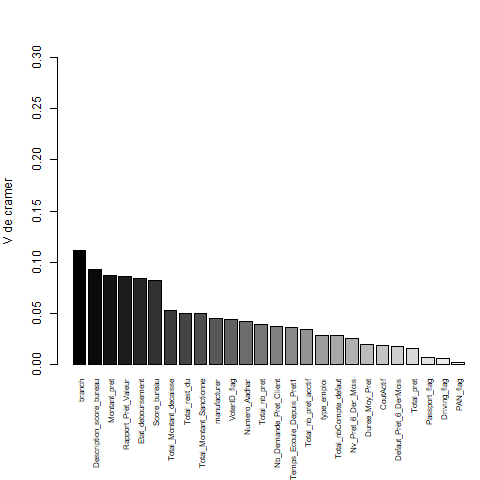

In [149]:
%%R
par (mar =c(8,4,4,0))
barplot(as.numeric(vcramer[,2]),col = gray(0:nrow(vcramer) / nrow(vcramer)),names.arg = vcramer[,1], ylab='V de cramer', ylim = c(0,0.30), cex.names = 0.7, las =3)

Les trois variables ayant une intensité forte sont Branch, Description Score et Montant du prêt

### Tests d'indépendance entre variables explicatives 

In [150]:
%%R
cram<-matrix(NA,ncol(VAR_QUALI),ncol(VAR_QUALI))
for (i in (1:ncol(VAR_QUALI))){
  for (j in (1:ncol(VAR_QUALI))){
cram[i,j]<-assocstats(table(VAR_QUALI[,i], VAR_QUALI[,j]))$cramer
}
  
}

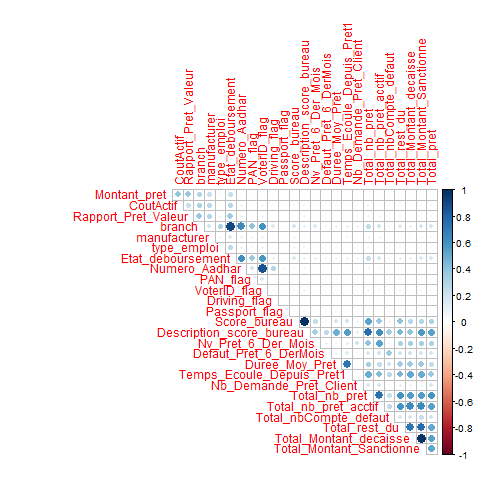

In [151]:
%%R
colnames(cram)<-colnames(VAR_QUALI)
rownames(cram)<-colnames(VAR_QUALI)
corrplot(cram, diag = F,type = "upper",is.corr = T)

Ici on se rend compte que certaines variables sont fortement liées entre elles 
 Il s'agit de 
 * Branch et Etat de deboursement
 * score bureau et description du score du bureau 
 * Total_montant_decaisse et Total_montant_sanctionne
 
 on devrait supprimer à chaque fois une des variables dans ce cas et plus présiement celles qui sont le plus correlées à la variable Cible avec le V cramer élevé. Ainsi donc parmi ces 06 variables on retiendra 03 qui sont 
 * Branch
 * Description_score_bureau
 * Total_montant_decaisse
 
 En résumé pour cette deuxième modélisation, on retiendra que 22 Variables explicatives pour la construction du score 

In [152]:
%%R
liste = c('Montant_pret', 'CoutActif', 'Rapport_Pret_Valeur', 'branch',
       'manufacturer', 'type_emploi', 'Numero_Aadhar',
        'VoterID_flag', 'Driving_flag', 'Passport_flag',
       'Description_score_bureau', 'Nv_Pret_6_Der_Mois',
       'Defaut_Pret_6_DerMois', 'Duree_Moy_Pret', 'Temps_Ecoule_Depuis_Pret1',
       'Nb_Demande_Pret_Client', 'Total_nb_pret', 'Total_nb_pret_acctif',
       'Total_nbCompte_defaut', 'Total_rest_du', 'Total_Montant_decaisse',
        'Total_pret', 'Defaut_paiement')
dataR = dataR[liste]

In [153]:
%%R
write.csv(x = dataR, file = "dataR_new")

In [154]:
dataR_new = pd.read_csv("dataR_new")

In [155]:
dataR_new = dataR_new.drop(columns = 'Unnamed: 0',axis = 1)

In [156]:
data_new['type_emploi'].value_counts()

Self employed    127635
Salaried          97857
Unemployed         7661
Name: type_emploi, dtype: int64

In [157]:
def encode(series):
    if series == 'Self employed':
        return 1
    elif series == 'Salaried':
        return 2
    else:
        return 3
dataR_new['type_emploi'] = dataR_new['type_emploi'].apply(encode)

In [158]:
X = dataR_new.drop('Defaut_paiement', axis=1)# X->Feature Variables
y = dataR_new['Defaut_paiement'] # y -> Target

from imblearn.over_sampling import SMOTE

X, y = SMOTE().fit_resample(X, y.values.ravel()) 

# checking the shape of X and y
print("Shape of x:", X.shape)
print("Shape of y:", y.shape)

Shape of x: (365084, 22)
Shape of y: (365084,)


In [159]:
# Splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

              precision    recall  f1-score   support

           0       0.72      0.63      0.67     36566
           1       0.67      0.76      0.71     36451

    accuracy                           0.69     73017
   macro avg       0.70      0.69      0.69     73017
weighted avg       0.70      0.69      0.69     73017

[[22943 13623]
 [ 8765 27686]]
accuracy is 0.6933864716435898
Sur ce jeu de données, le taux de succès en classification moyen de : 0.6872806540836958


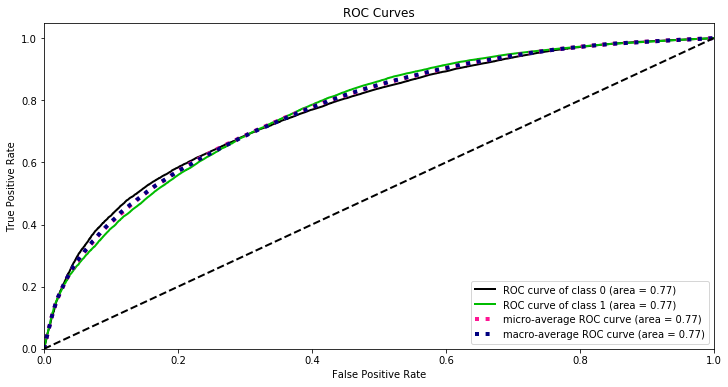

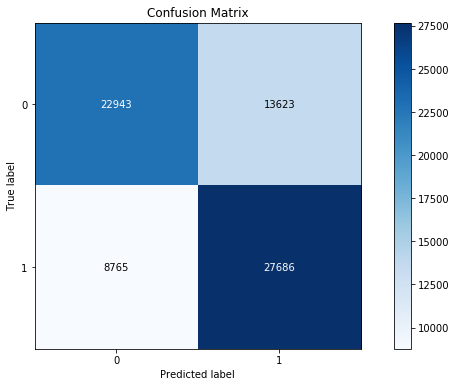

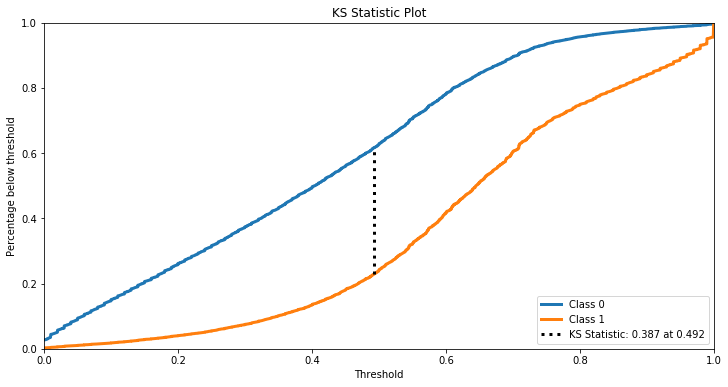

In [160]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import scikitplot as skplt
from sklearn.ensemble import RandomForestClassifier

Model_ran=RandomForestClassifier()

Model_ran = Model_ran.fit(X_train, y_train)
y_probas = Model_ran.predict_proba(X_test)
y_pred = Model_ran.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))
score = cross_val_score(Model_ran, X_train, y_train,cv=10)
print ("Sur ce jeu de données, le taux de succès en classification moyen de :",score.mean())

skplt.metrics.plot_roc(y_test, y_probas)
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
skplt.metrics.plot_ks_statistic(y_test, y_probas)
plt.show()

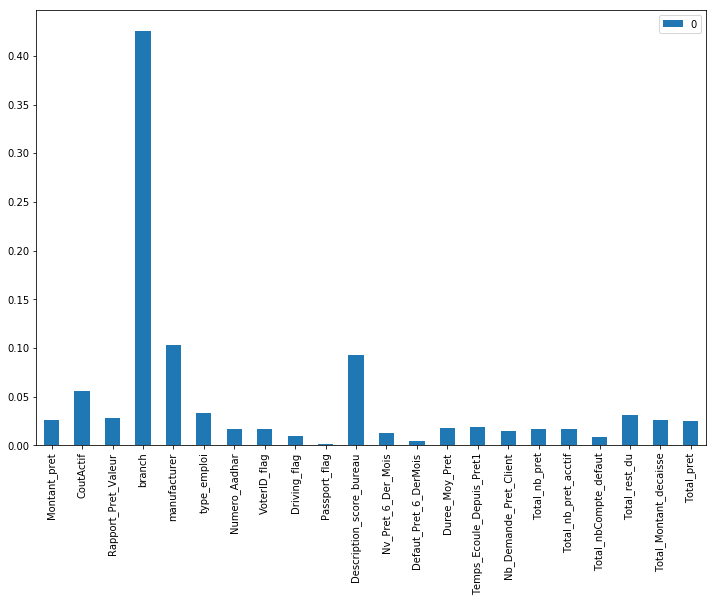

In [161]:
# les variables importantes dans la construction du modele
pd.DataFrame(Model_ran.feature_importances_, index = X_train.columns).plot.bar(figsize=(12, 8))

C:\Users\berni\Nouveau dossier (4)\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.60      0.55      0.58     36566
           1       0.58      0.63      0.61     36451

    accuracy                           0.59     73017
   macro avg       0.59      0.59      0.59     73017
weighted avg       0.59      0.59      0.59     73017

[[20260 16306]
 [13535 22916]]
accuracy is 0.5913143514524015


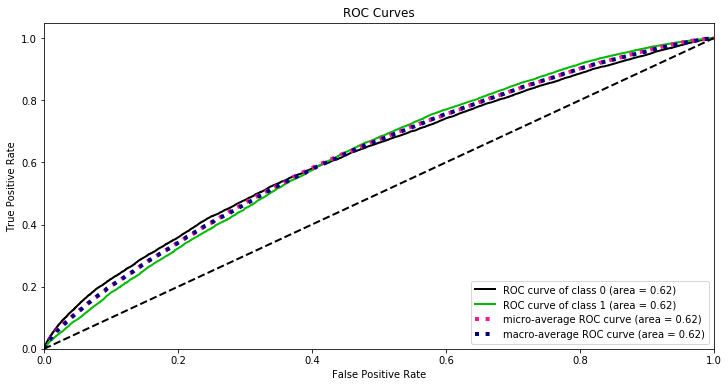

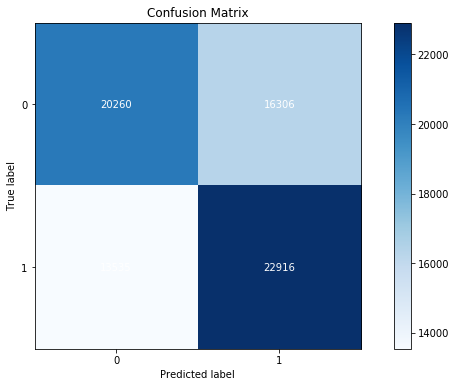

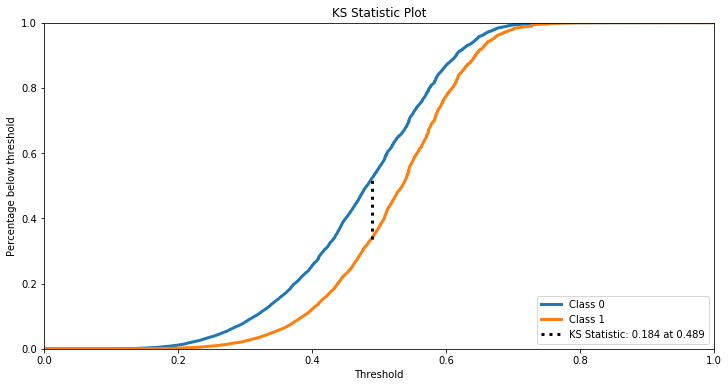

In [163]:
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt

Model_log = LogisticRegression()

Model_log = Model_log.fit(X_train, y_train)
y_probas = Model_log.predict_proba(X_test)
y_pred = Model_log.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))


skplt.metrics.plot_roc(y_test, y_probas)
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
skplt.metrics.plot_ks_statistic(y_test, y_probas)
plt.show()

Finalement le .1er modèle présente de meilleurs résultats que lorsqu'on discretise les variables. On l'observe bien avec un taux d'accuracy qui a diminué

### Comparaison des modèles 

In [166]:
def encode(series):
    if series == 'Self employed':
        return 1
    elif series == 'Salaried':
        return 2
    else:
        return 3
data_new['type_emploi'] = data_new['type_emploi'].apply(encode)

C:\Users\berni\Nouveau dossier (4)\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [167]:
X = data_new.drop('Defaut_paiement', axis=1)# X->Feature Variables
y = data_new['Defaut_paiement'] # y -> Target

from imblearn.over_sampling import SMOTE

X, y = SMOTE().fit_resample(X, y.values.ravel()) 

# checking the shape of X and y
print("Shape of x:", X.shape)
print("Shape of y:", y.shape)

Shape of x: (365084, 26)
Shape of y: (365084,)


In [168]:
# Splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [169]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler,MaxAbsScaler

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\berni\Nouveau dossier (4)\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


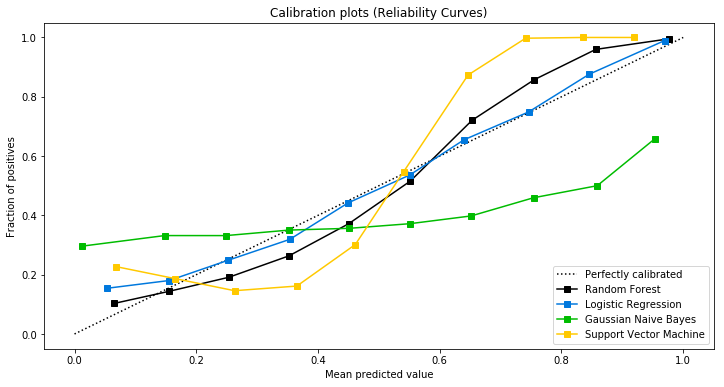

In [170]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
rf = RandomForestClassifier()
lr = LogisticRegression()
nb = GaussianNB()
svm = LinearSVC()
rf_probas = rf.fit(X_train, y_train).predict_proba(X_test)
lr_probas = lr.fit(X_train, y_train).predict_proba(X_test)
nb_probas = nb.fit(X_train, y_train).predict_proba(X_test)
svm_scores = svm.fit(X_train, y_train).decision_function(X_test)
probas_list = [rf_probas, lr_probas, nb_probas, svm_scores]
clf_names = ['Random Forest', 'Logistic Regression','Gaussian Naive Bayes', 'Support Vector Machine']
skplt.metrics.plot_calibration_curve(y_test,probas_list,clf_names)
plt.show()